In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

___
## Call the data sets

In [2]:
air = wrangle.clean_air()
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-20 00:01:27,8,6,8,0,0.0,0,0,None,2021-05-20,...,3,Good,0.141204,Good,Good,6.704282,Good,Good,8.568287,Good


In [3]:
air.AQI_CO.value_counts()

Good                              106142
Moderate                             121
Hazardous                             23
Unhealthy                              1
Very Unhealthy                         0
Unhealthy for Sensitive Groups         0
Name: AQI_CO, dtype: int64

In [4]:
air.AQI_CO_24hr.value_counts()

Good                              106287
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Moderate                               0
Name: AQI_CO_24hr, dtype: int64

In [5]:
air.AQI_pm2_5.value_counts()

Good                              78187
Moderate                          24820
Unhealthy for Sensitive Groups     2373
Unhealthy                           859
Hazardous                             3
Very Unhealthy                        1
Name: AQI_pm2_5, dtype: int64

In [6]:
air.AQI_pm_25_24hr.value_counts()

Good                              78017
Moderate                          24817
Unhealthy                          3453
Hazardous                             0
Very Unhealthy                        0
Unhealthy for Sensitive Groups        0
Name: AQI_pm_25_24hr, dtype: int64

In [7]:
air.AQI_pm10.value_counts()

Good                              104539
Moderate                            1744
Unhealthy for Sensitive Groups         1
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Name: AQI_pm10, dtype: int64

In [8]:
air.AQI_pm10_24hr.value_counts()

Good                              106287
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Moderate                               0
Name: AQI_pm10_24hr, dtype: int64

More info on air quality (idea is to make a level of air quality)
- https://forum.airnowtech.org/t/the-aqi-equation/169
- https://forum.airnowtech.org/t/aqi-calculations-overview-ozone-pm2-5-and-pm10/168
- https://www.airnow.gov/aqi/aqi-basics/
- https://fit.thequint.com/health-news/explaining-air-quality-index#read-more
- https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf
- https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf
- 

In [9]:
air_train, air_validate, air_test = wrangle.split_data(air)

___
# Explore Air Quality

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [10]:
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-20 00:01:27,8,6,8,0,0.0,0,0,None,2021-05-20,...,3,Good,0.141204,Good,Good,6.704282,Good,Good,8.568287,Good



## Univariate Exploration

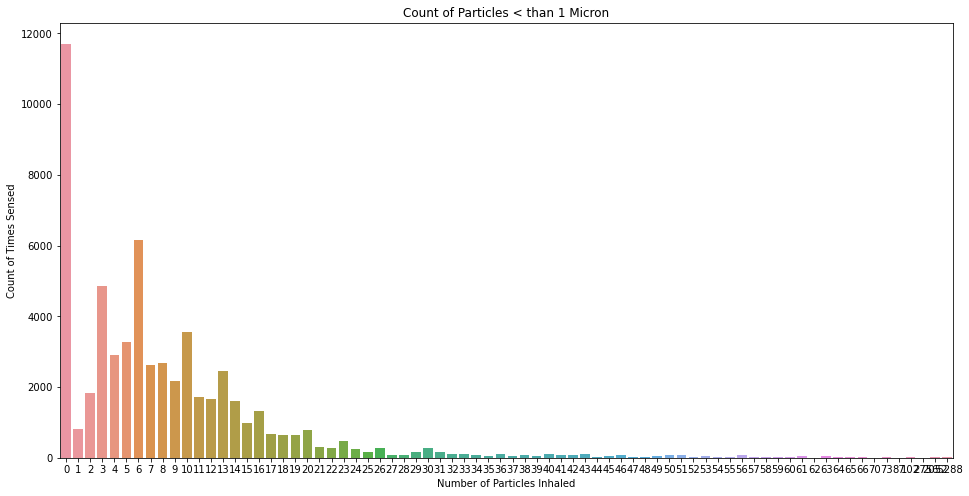

In [11]:
plt.figure(figsize=(16,8))
sns.countplot(data=air_train, x='Pm1_0')
plt.title('Count of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

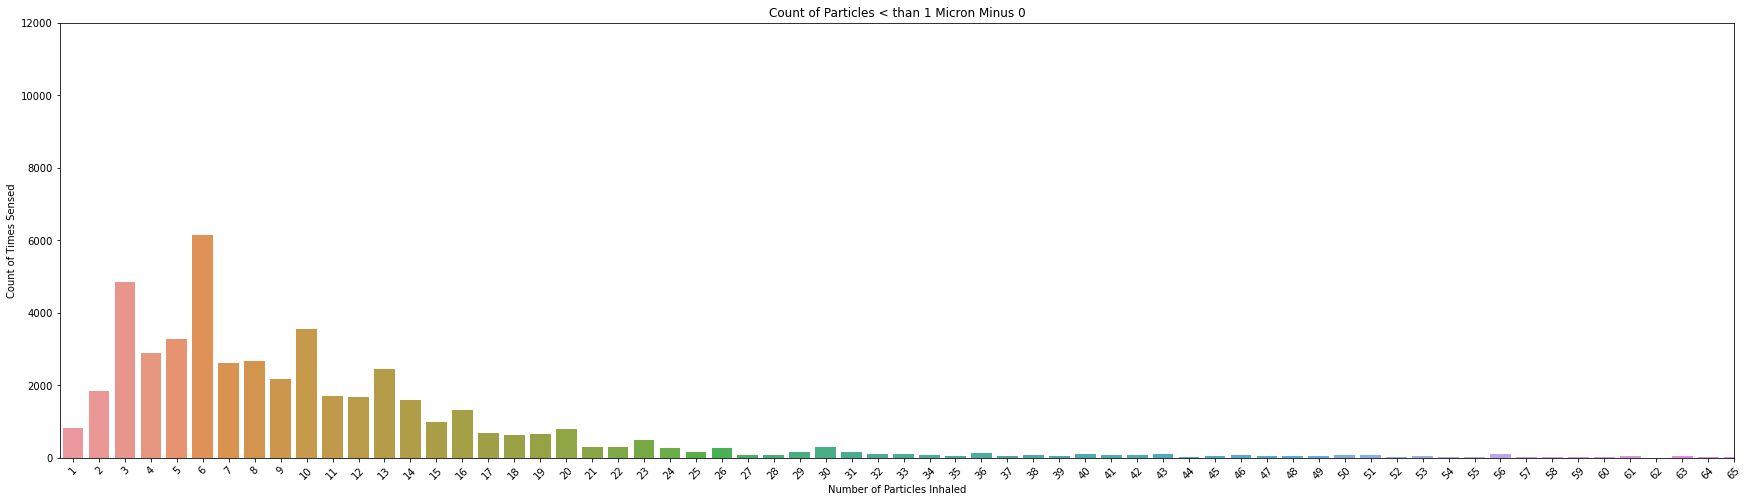

In [12]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air_train, x='Pm1_0')
plot.set(xlim=(0.5, 65))
plot.set(ylim=(0, 12000))
plt.xticks(rotation=45)
plt.title('Count of Particles < than 1 Micron Minus 0')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

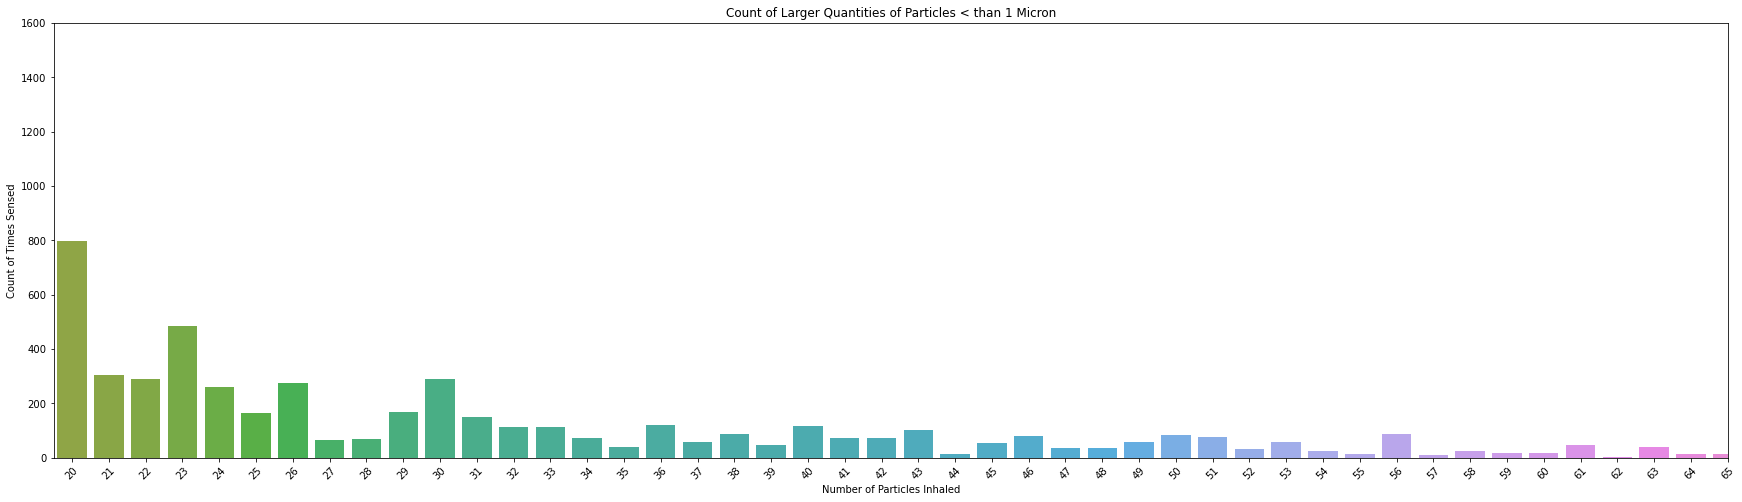

In [13]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air_train, x='Pm1_0')
plot.set(xlim=(19.5, 65))
plot.set(ylim=(0, 1600))
plt.xticks(rotation=45)
plt.title('Count of Larger Quantities of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [14]:
air_train.Pm1_0.value_counts()

0        11708
6         6150
3         4846
10        3563
5         3264
         ...  
65288       11
70           7
275          1
62           1
87           1
Name: Pm1_0, Length: 74, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 6, 3, 10, and 5
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 36, and 56
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

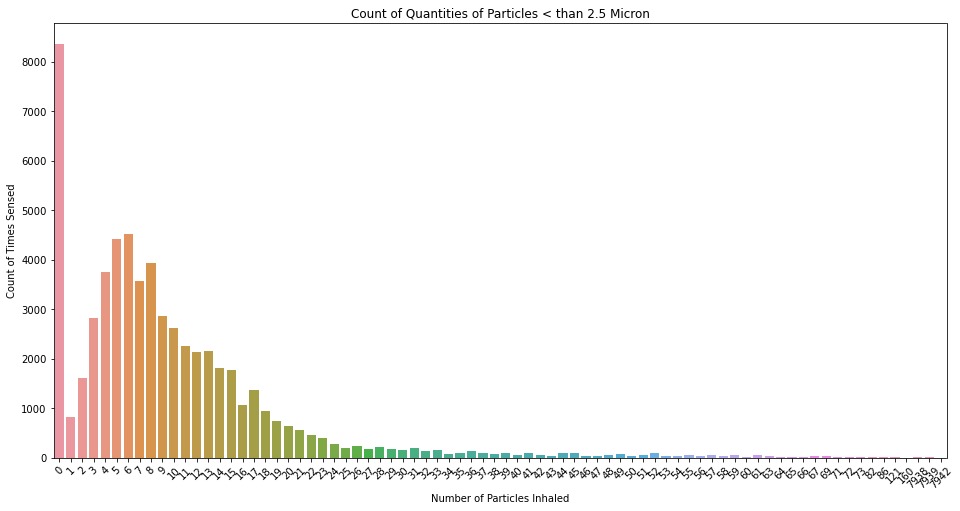

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(data=air_train, x='Pm2_5')
plt.xticks(rotation=45)
plt.title('Count of Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

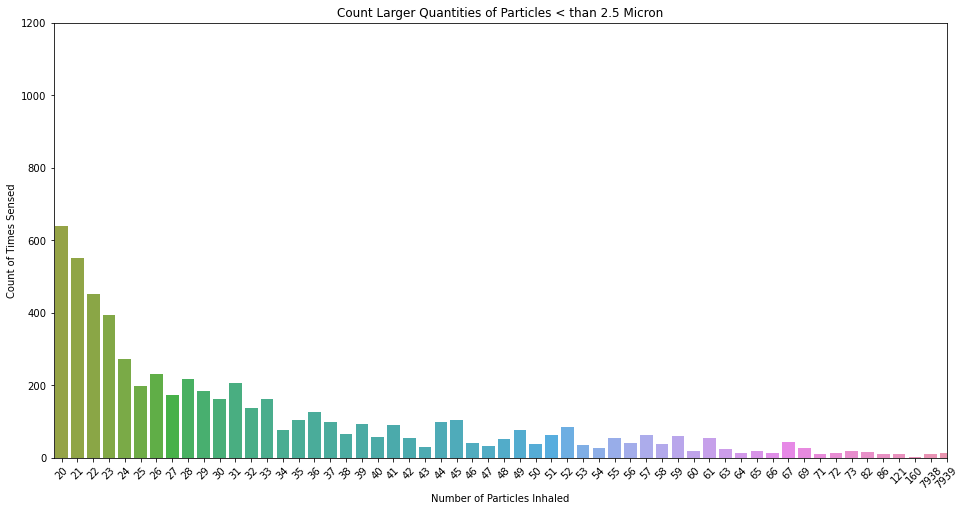

In [16]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='Pm2_5')
plot.set(xlim=(19.5, 76))
plot.set(ylim=(0, 1200))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [17]:
air_train.Pm2_5.value_counts()

0       8370
6       4520
5       4418
8       3927
4       3750
        ... 
121       10
71         9
86         9
7942       1
160        1
Name: Pm2_5, Length: 78, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 6, 5, 8, and 4
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes throughout

___

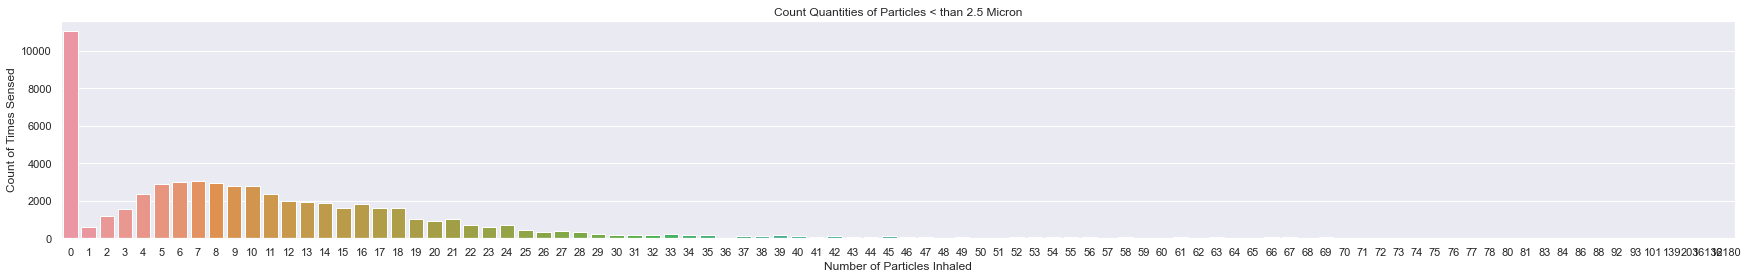

In [77]:
plt.figure(figsize=(30,4))
sns.countplot(data=air_train, x='Pm10')
plt.title('Count Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

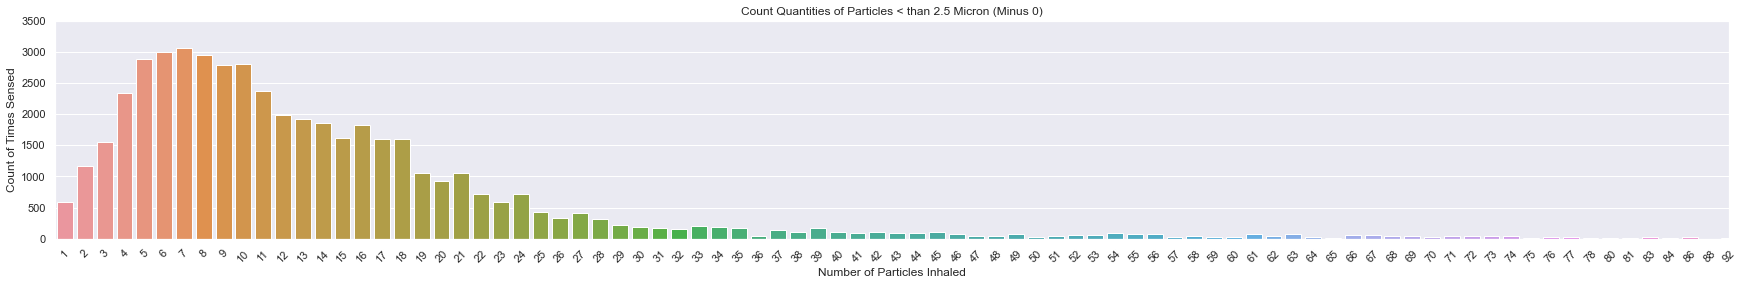

In [78]:
plt.figure(figsize=(30,4))
plot = sns.countplot(data=air_train, x='Pm10')
plot.set(xlim=(0.5, 85))
plot.set(ylim=(0, 3500))
plt.xticks(rotation=45)
plt.title('Count Quantities of Particles < than 2.5 Micron (Minus 0)')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

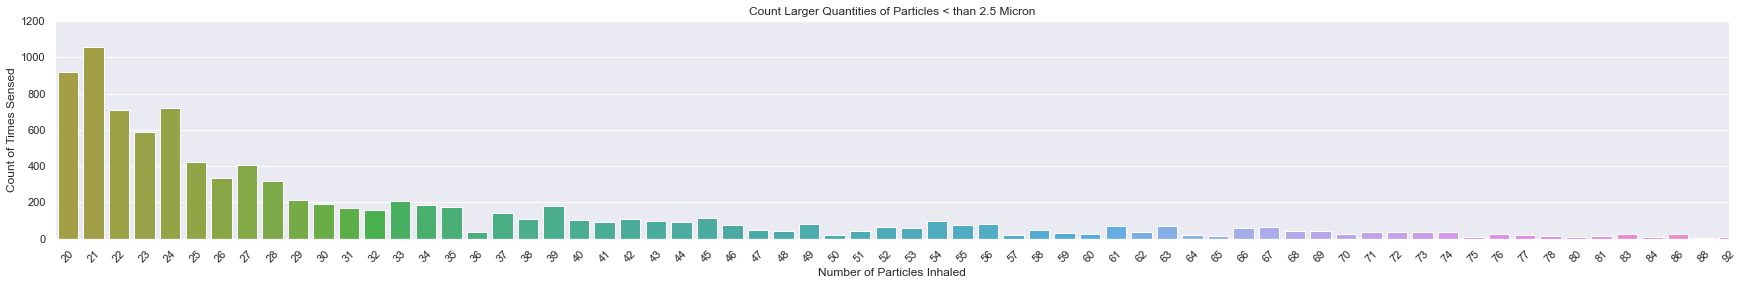

In [79]:
plt.figure(figsize=(30,4))
plot = sns.countplot(data=air_train, x='Pm10')
plot.set(xlim=(19.5, 85))
plot.set(ylim=(0, 1200))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [21]:
air_train.Pm10.value_counts()

0        11051
7         3068
6         3009
8         2952
5         2897
         ...  
92           8
88           1
16132        1
16180        1
203          1
Name: Pm10, Length: 92, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 7, 8, 6, and 5
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes throughout
___

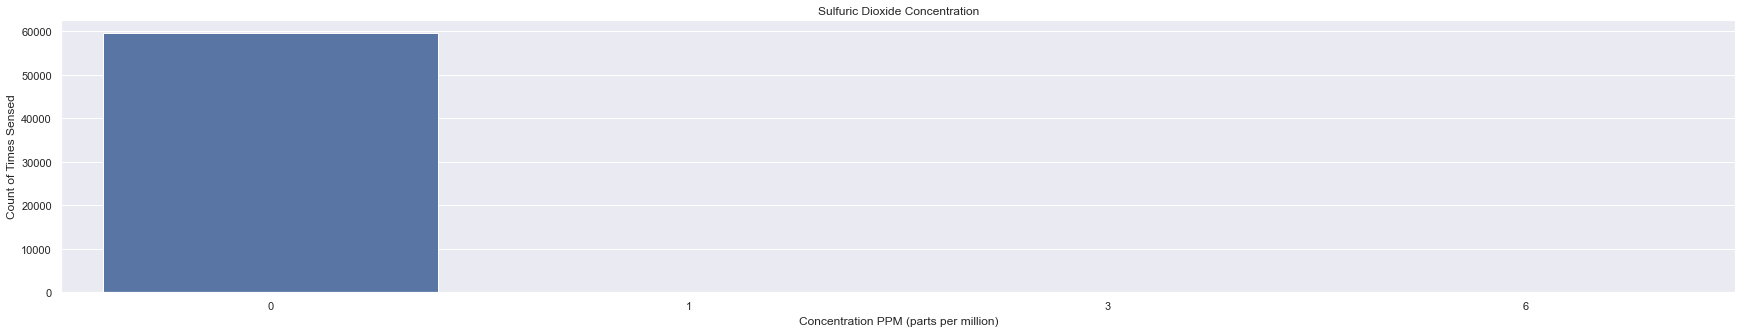

In [80]:
plt.figure(figsize=(30,5))
sns.countplot(data=air_train, x='SO2')
plt.title('Sulfuric Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

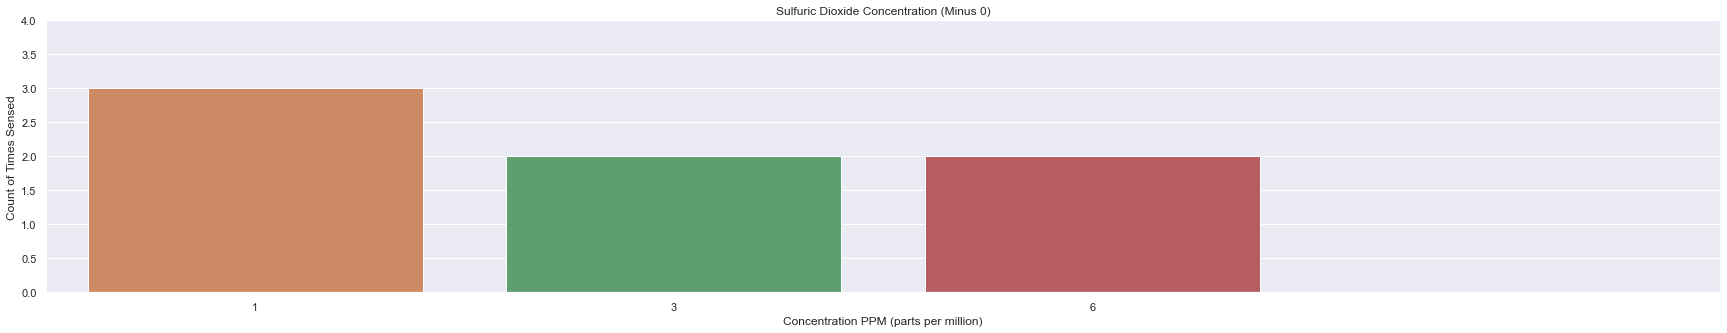

In [83]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='SO2')
plot.set(xlim=(0.5, 4.5))
plot.set(ylim=(0, 4))
plt.title('Sulfuric Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [24]:
air_train.SO2.value_counts()

0    59513
1        3
6        2
3        2
Name: SO2, dtype: int64

### Takeaways:
- There are barley and readings outside of 0 for SO2

___

Text(0, 0.5, 'Count of Times Sensed')

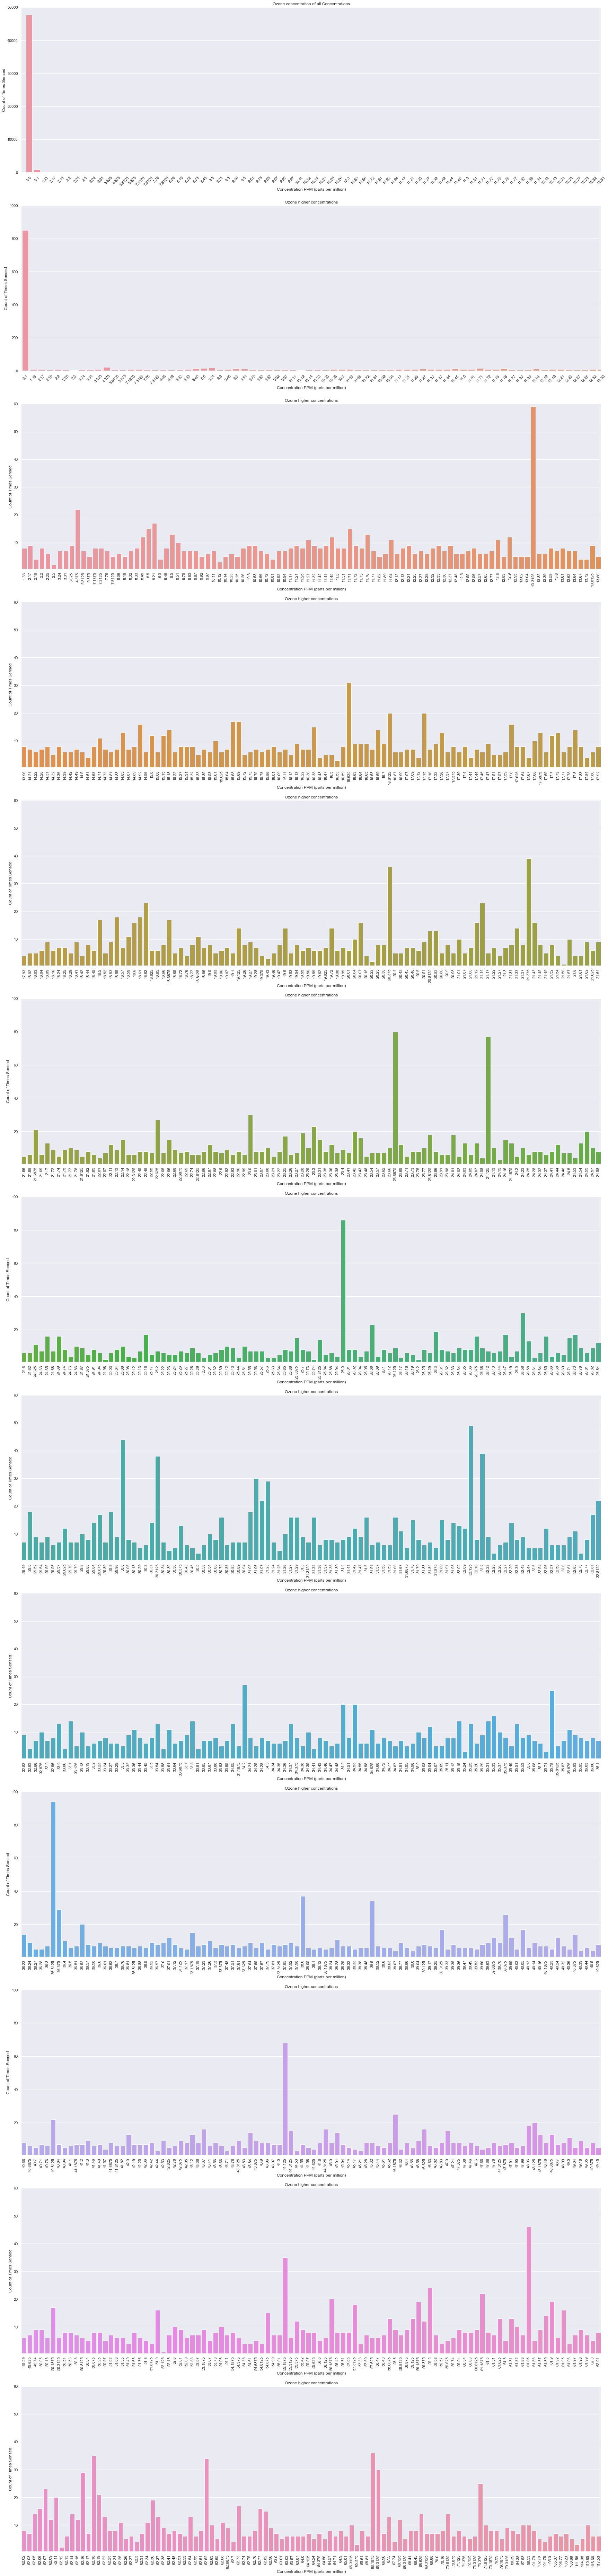

In [120]:
plt.subplots(13,1, figsize=(30,135), sharey=True)
sns.set(style="darkgrid")

plt.subplot(13,1,1)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(-1, 72))
plot.set(ylim=(0, 50000))
plt.xticks(rotation=45)
plt.title('Ozone concentration of all Concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,2)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(0.5, 72))
plot.set(ylim=(0, 1000))
plt.xticks(rotation=45)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,3)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(1.5, 99.5))
plot.set(ylim=(.5, 60))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,4)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(99.5, 199.5))
plot.set(ylim=(.5, 60))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,5)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(199.5, 299.5))
plot.set(ylim=(.5, 60))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,6)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(299.5, 399.5))
plot.set(ylim=(.5, 100))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,7)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(399.5, 499.5))
plot.set(ylim=(.5, 100))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,8)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(599.5, 699.5))
plot.set(ylim=(.5, 60))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,9)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(699.5, 799.5))
plot.set(ylim=(.5, 60))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,10)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(799.5, 899.5))
plot.set(ylim=(.5, 100))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,11)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(899.5, 999.5))
plot.set(ylim=(.5, 100))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,12)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(999.5, 1099.5))
plot.set(ylim=(.5, 60))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(13,1,13)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(1099.5, 1207.5))
plot.set(ylim=(.5, 60))
plt.xticks(rotation=90)
plt.title('Ozone higher concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

In [27]:
air_train.O3.value_counts()

0.0000     47666
0.1000       850
36.3125       94
26.0000       86
23.6875       80
           ...  
2.5000         2
24.9800        2
21.5600        1
52.1250        1
27.9200        1
Name: O3, Length: 1208, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 0.1, 36.3125, 26, and 23.6875
- There are MAJOR spikes in the higher concentration ranges
- There is no obvius trend based on this data
___ 

Text(0, 0.5, 'Count of Times Sensed')

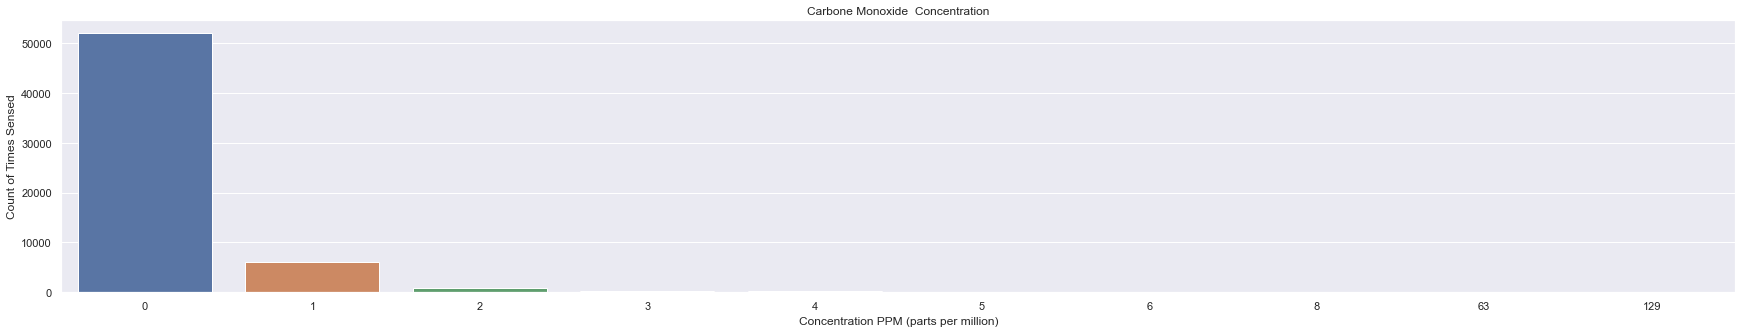

In [121]:
plt.figure(figsize=(30,5))
sns.countplot(data=air_train, x='CO')
plt.title('Carbone Monoxide  Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

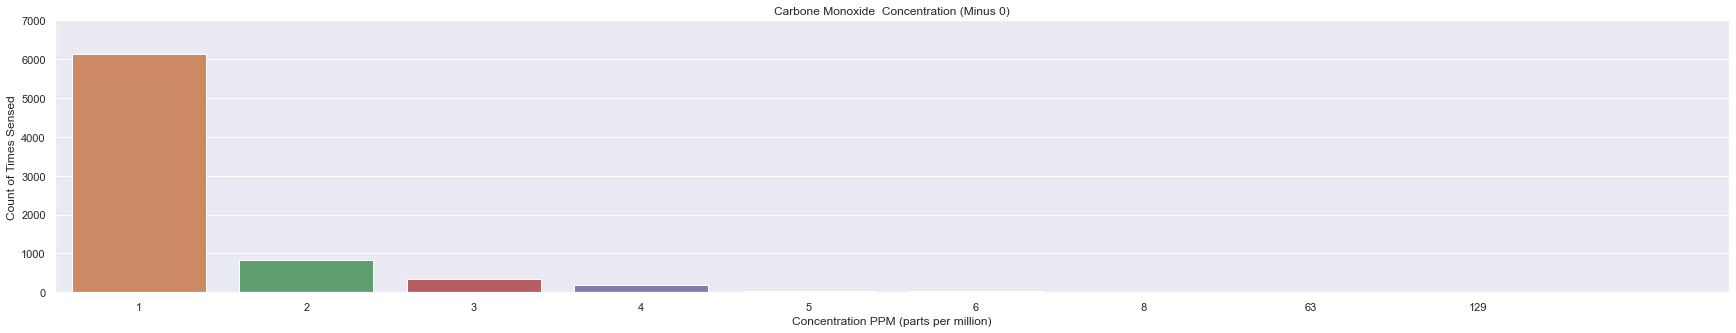

In [123]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='CO')
plot.set(xlim=(0.5, 10.5))
plot.set(ylim=(0, 7000))
plt.title('Carbone Monoxide  Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

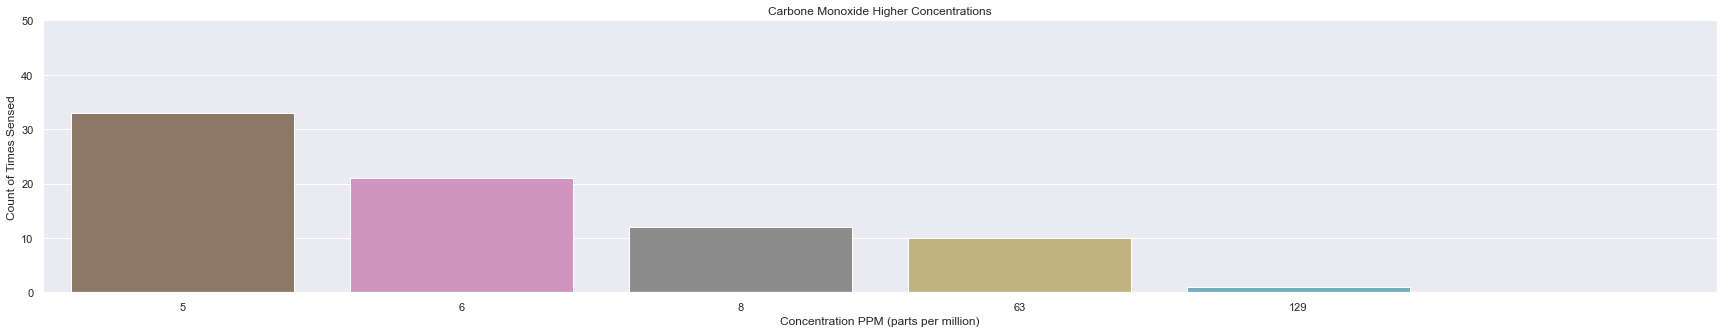

In [128]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='CO')
plot.set(xlim=(4.5, 10.5))
plot.set(ylim=(0, 50))
plt.title('Carbone Monoxide Higher Concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [30]:
air_train.CO.value_counts()

0      51984
1       6126
2        829
3        330
4        174
5         33
6         21
8         12
63        10
129        1
Name: CO, dtype: int64

### Takeaways:
- The higher the concentration the lower the amount of times it has been recorded.
- There is a constant downwards trend

___

Text(0, 0.5, 'Count of Times Sensed')

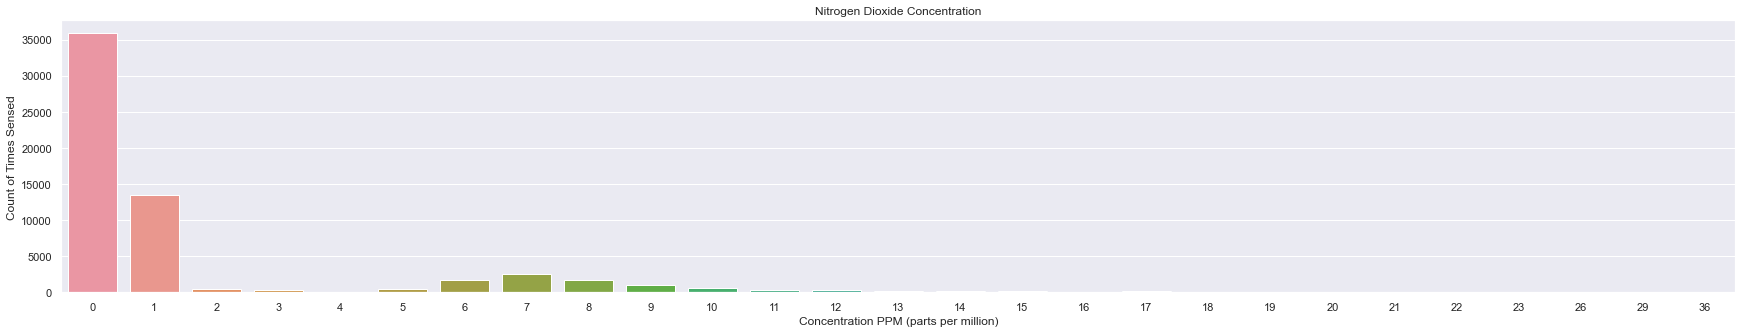

In [129]:
plt.figure(figsize=(30,5))
sns.countplot(data=air_train, x='NO2')
plt.title('Nitrogen Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

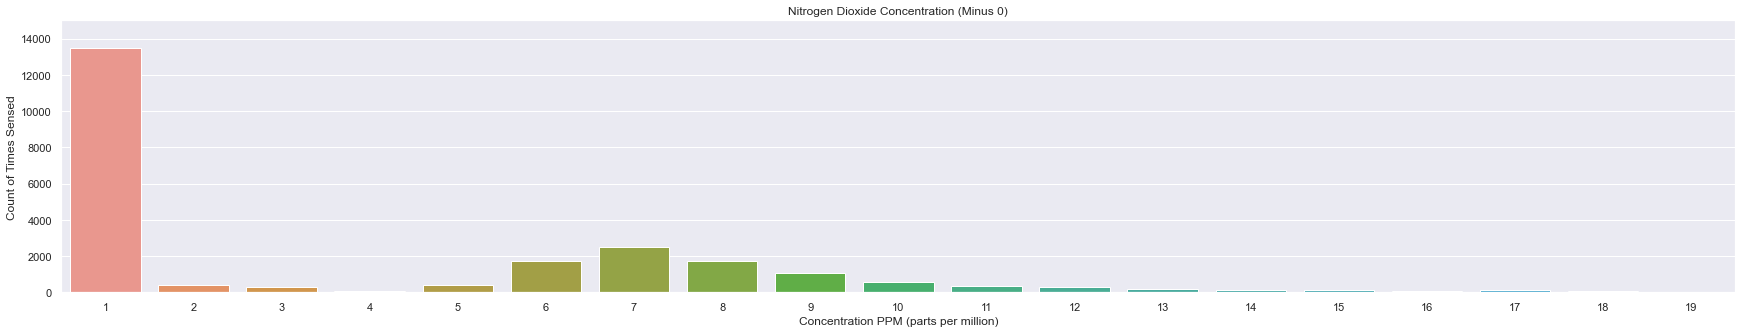

In [130]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='NO2')
plot.set(xlim=(0.5, 19.5))
plot.set(ylim=(0, 15000))
plt.title('Nitrogen Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

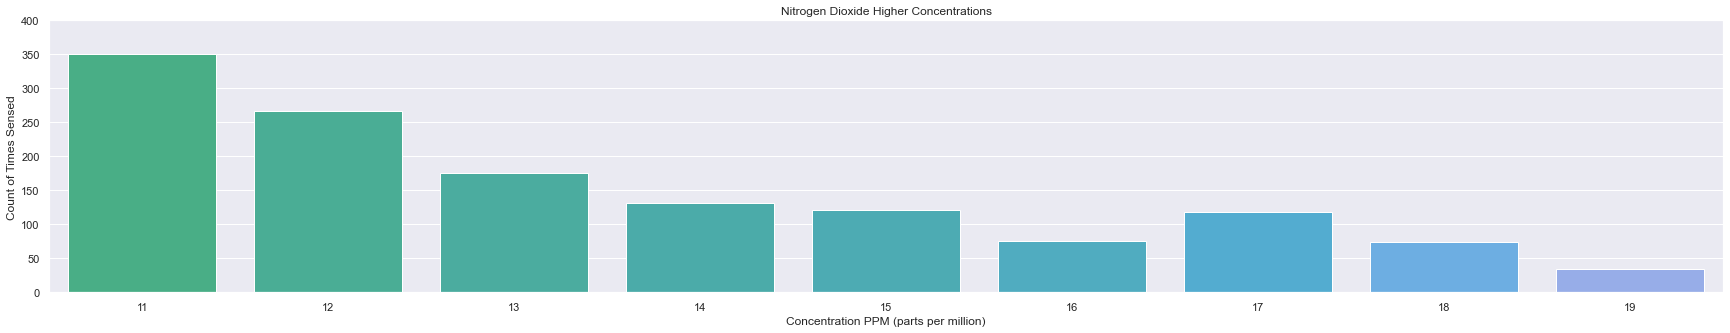

In [134]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='NO2')
plot.set(xlim=(10.5, 19.5))
plot.set(ylim=(0, 400))
plt.title('Nitrogen Dioxide Higher Concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

### Takeaways:
- Top 5 readings are at 0, 1, 7, 6, and 8
- steady spike from concentration of 5-10

___

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

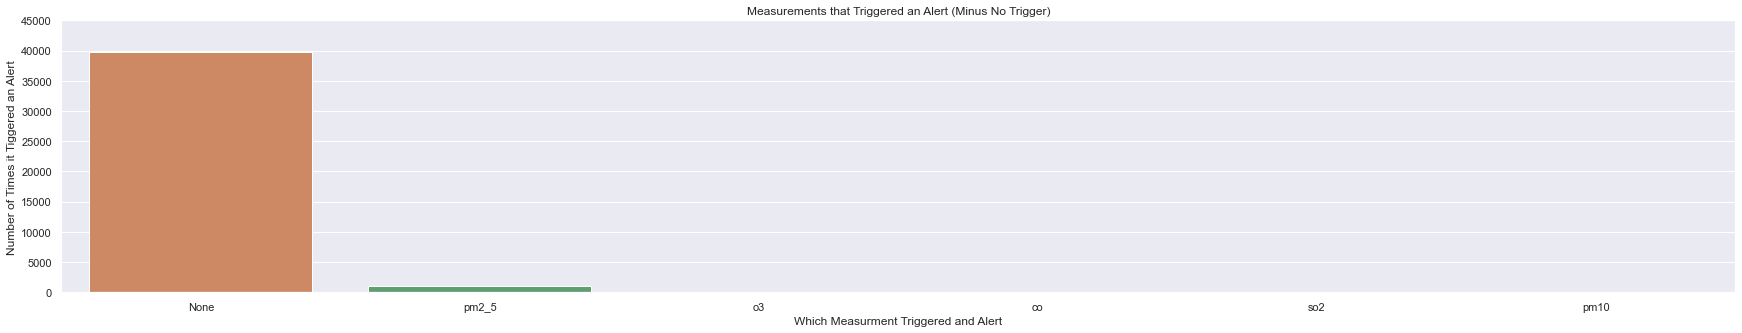

In [137]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered')
plot.set(xlim=(0.5, 6.5))
plot.set(ylim=(0, 45000))
plt.title('Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [36]:
air_train.alert_triggered.value_counts()

None     39710
no2      18652
pm2_5     1113
o3          25
co          11
so2          7
pm10         2
Name: alert_triggered, dtype: int64

### Takeaways:
- Nitrogen Dioxide mostly contributes to being a trigger.
___

Text(0.5, 1.0, 'Sales Amount by Weekday')

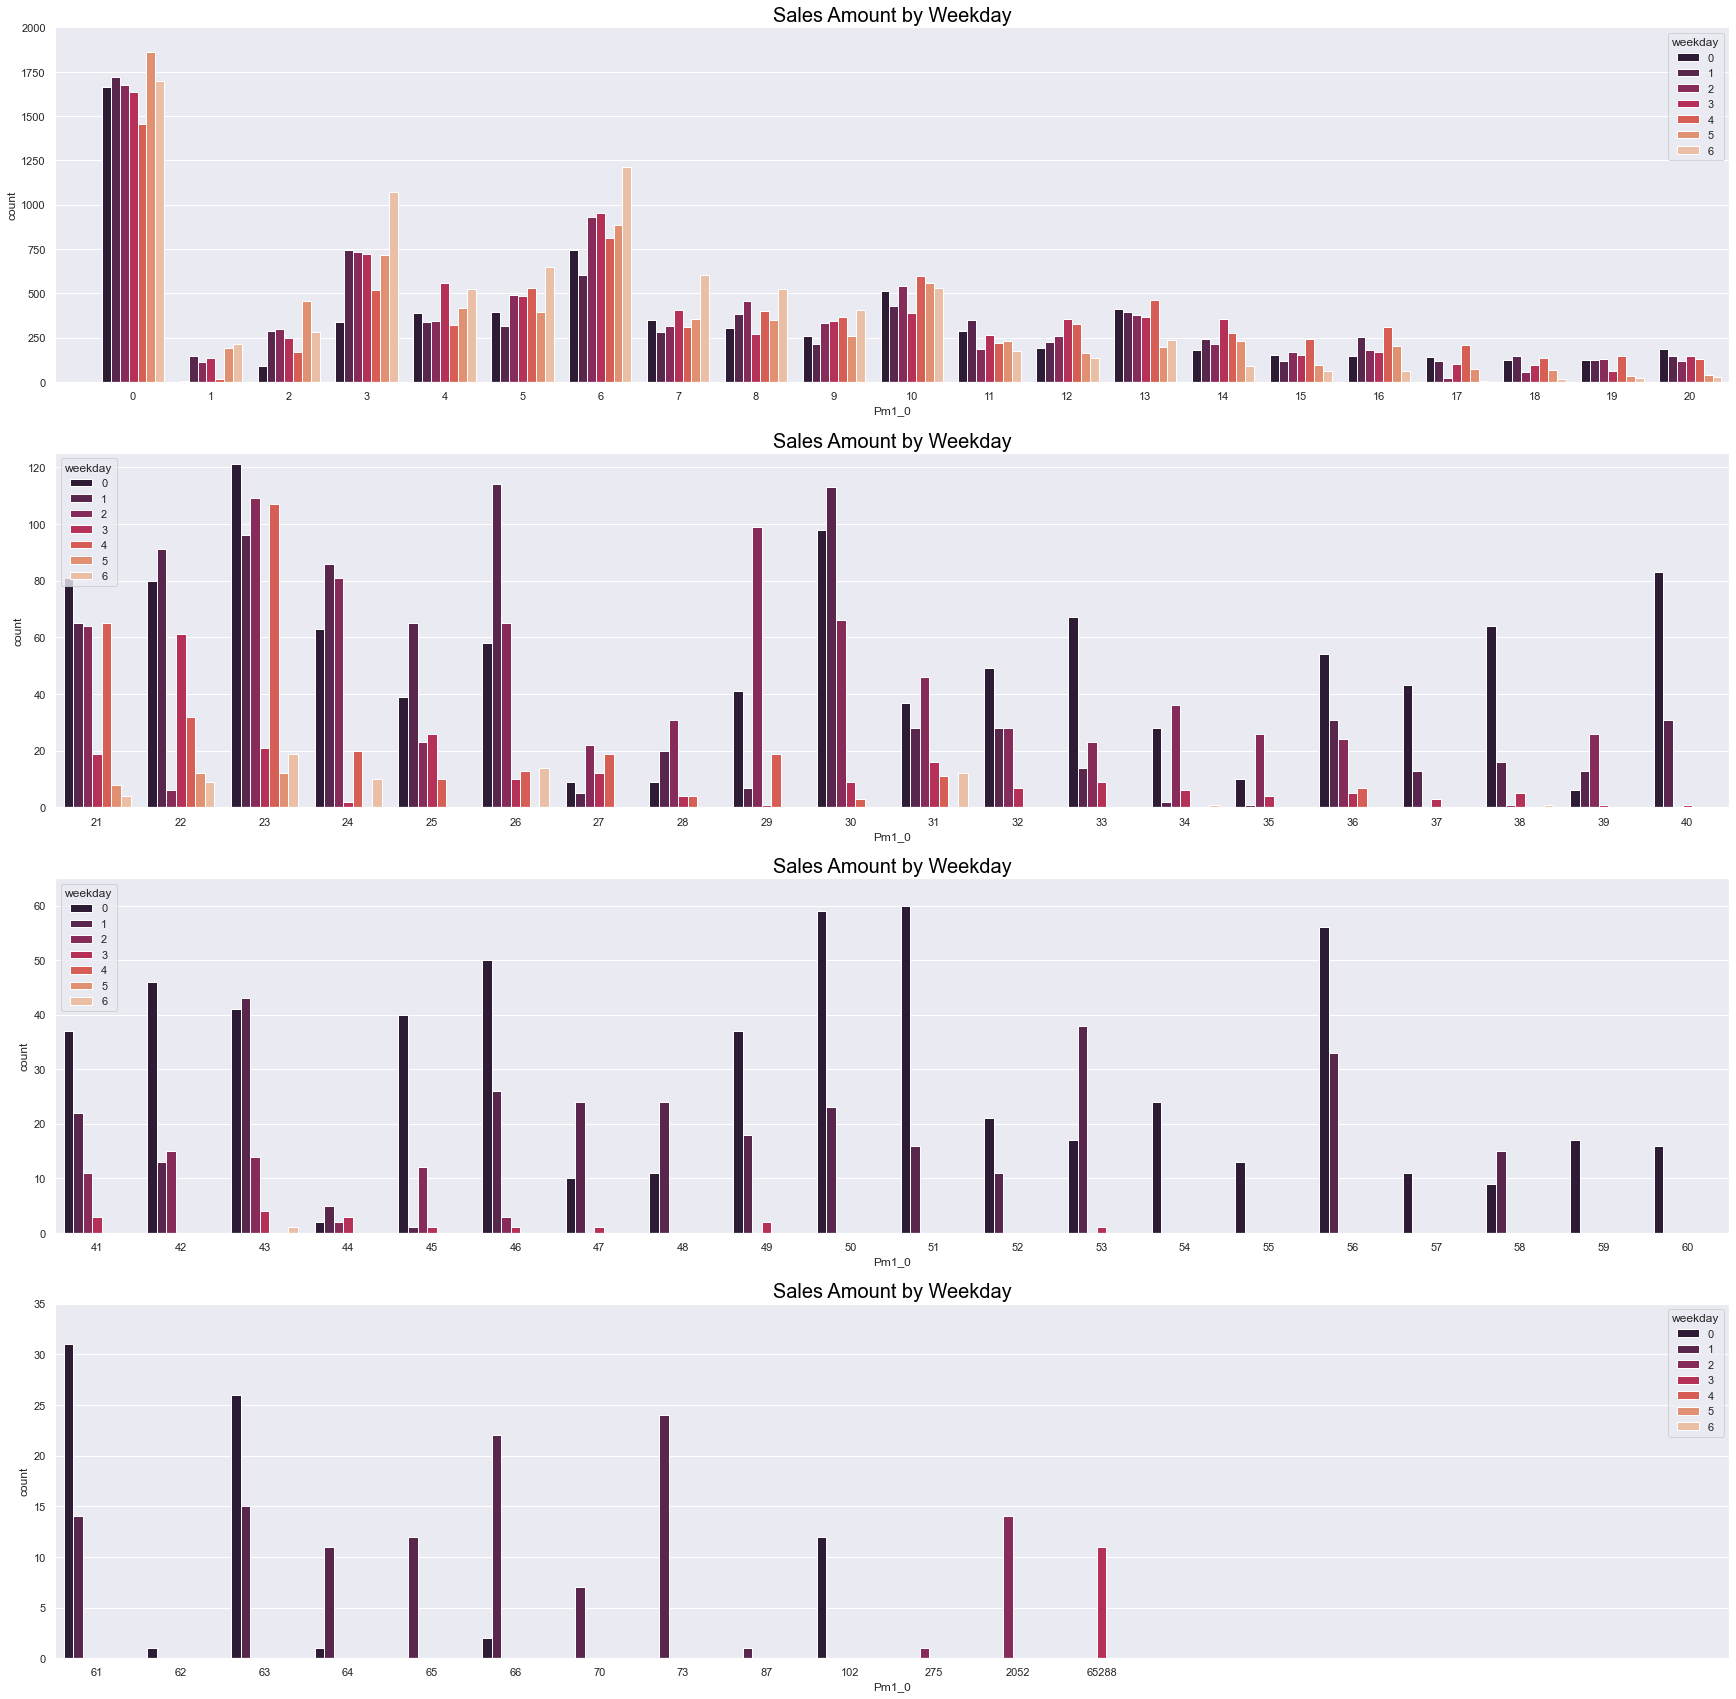

In [138]:
plt.subplots(4,1, figsize=(30,30), sharey=True)
sns.set(style="darkgrid")

plt.subplot(4,1,1)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(-1, 20.5))
plot.set(ylim=(0, 2000))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,2)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(20.5, 40.5))
plot.set(ylim=(0, 125))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,3)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(40.5, 60.5))
plot.set(ylim=(0, 65))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,4)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(60.5, 80.5))
plot.set(ylim=(0, 35))
plt.title('Sales Amount by Weekday', size=20, color='black')

### Takeaways:
- Weekday
    - 0 = Monday
    - 1 = Tuesday
    - 2 = Wednesday
    - 3 = Thursday
    - 4 = Friday
    - 5 = Saturday
    - 6 = Sunday
- PM 10 Concentration readings higher then 40 usually are being picked up earlier in the work week.
___

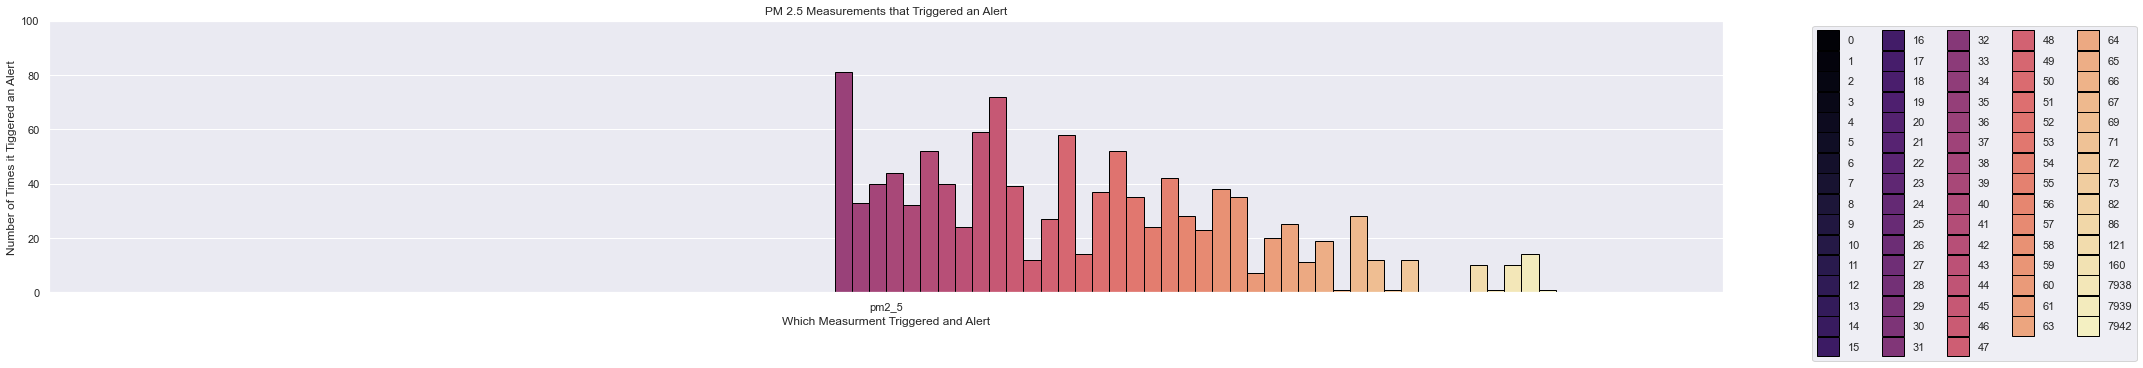

In [140]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 100))
plt.title('PM 2.5 Measurements that Triggered an Alert')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- Whats up with this gap between 69 and 82?
    - all of the readings in the legend are actual readigs so why are these higher concentrations not triggering an alert?
___

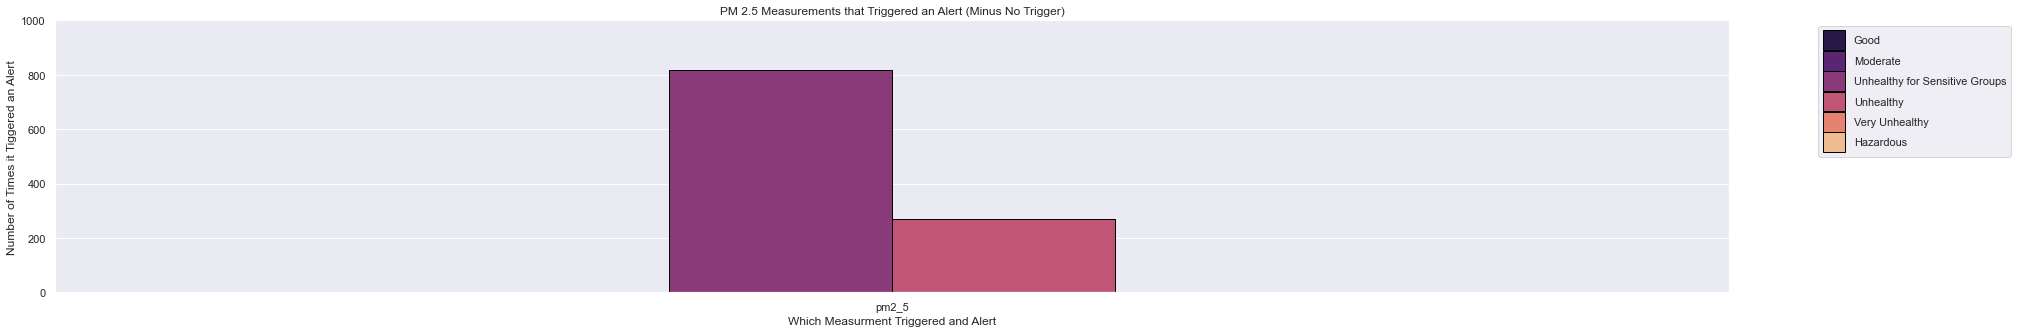

In [141]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 1000))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

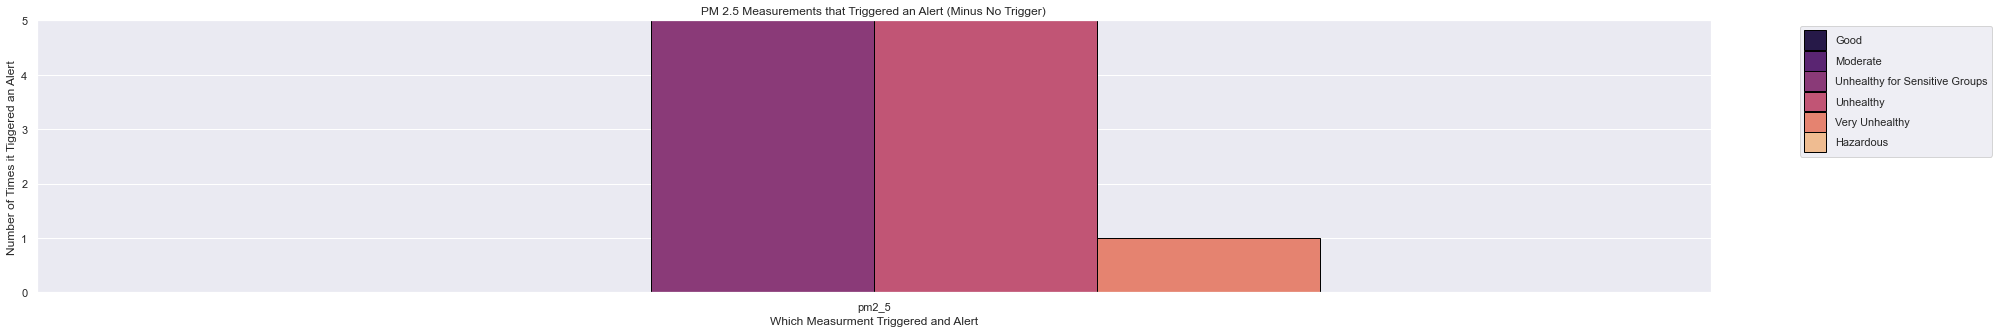

In [144]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 5))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [142]:
air.AQI_pm2_5.value_counts()

Good                              78187
Moderate                          24820
Unhealthy for Sensitive Groups     2373
Unhealthy                           859
Hazardous                             3
Very Unhealthy                        1
Name: AQI_pm2_5, dtype: int64

### Takeaways:
- It seems like alert triggered is not picking up any of the hazardous readings
    - Hazerdous readings for pm 2.5 is anything above 250.5
        - there are 3 readings like this.
____

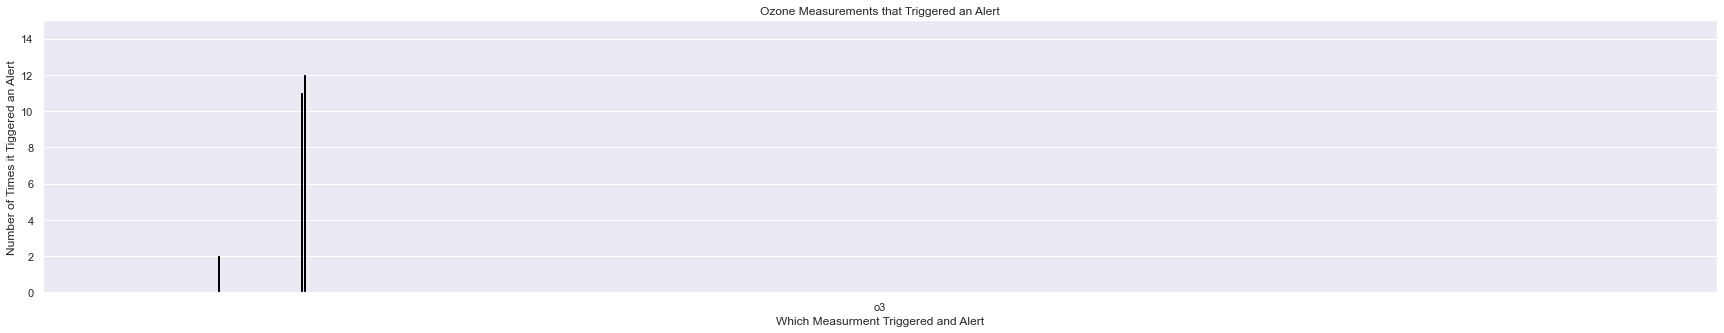

In [150]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='O3', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 15))
plt.title('Ozone Measurements that Triggered an Alert')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plot.legend_ = None

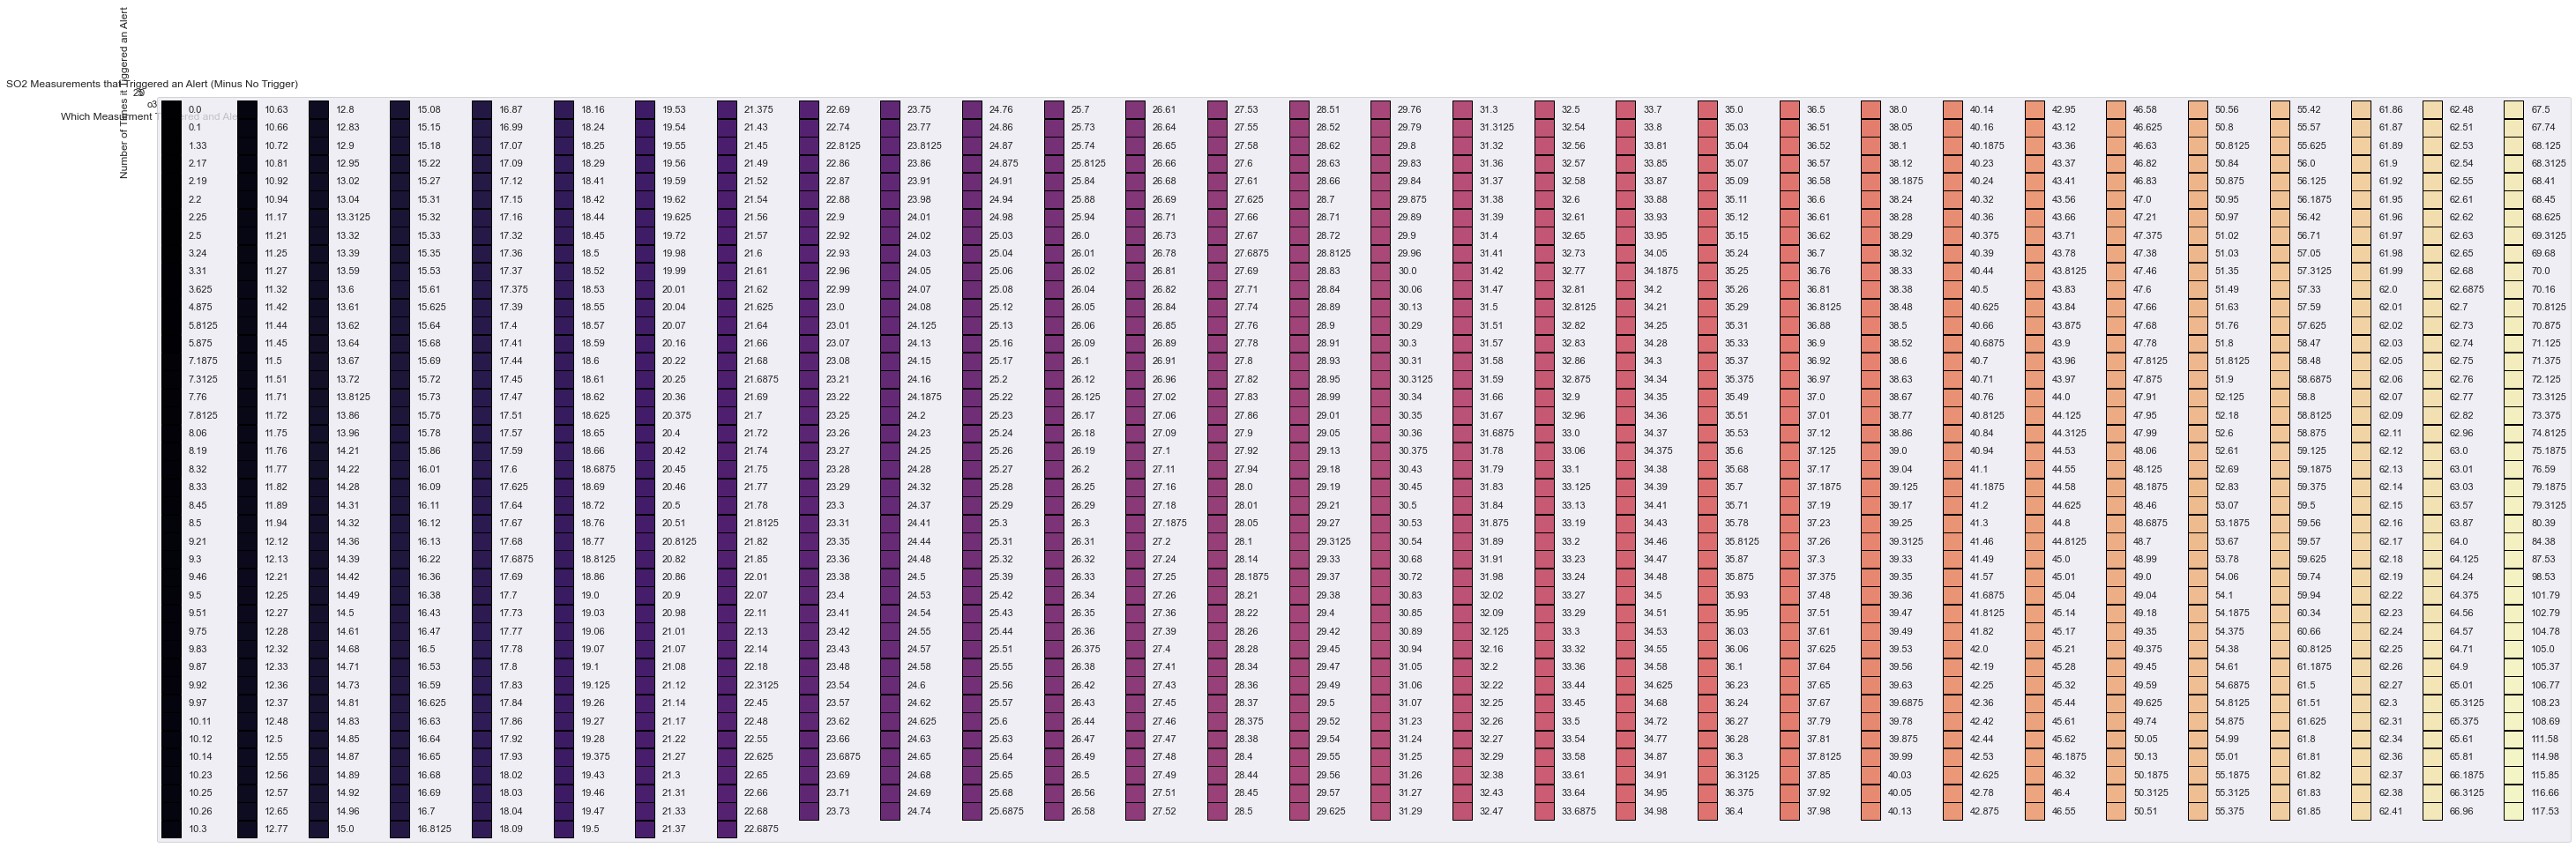

In [151]:
plt.figure(figsize=(0,0))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='O3', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 30))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=30,handleheight=2.4, labelspacing=0.05)


### Takeaways:
- Why are thie higher readings not triggering any alert?
    - this right from low to high on the x axis
___

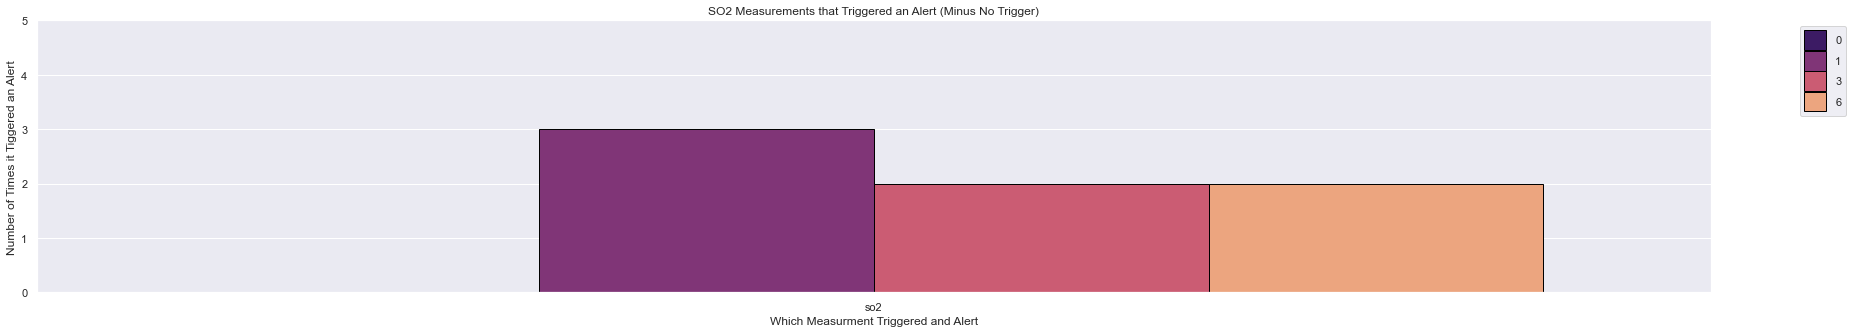

In [153]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='SO2', palette='magma',edgecolor='black')
plot.set(xlim=(4.5, 5.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- Not enough data to gain any insight
___

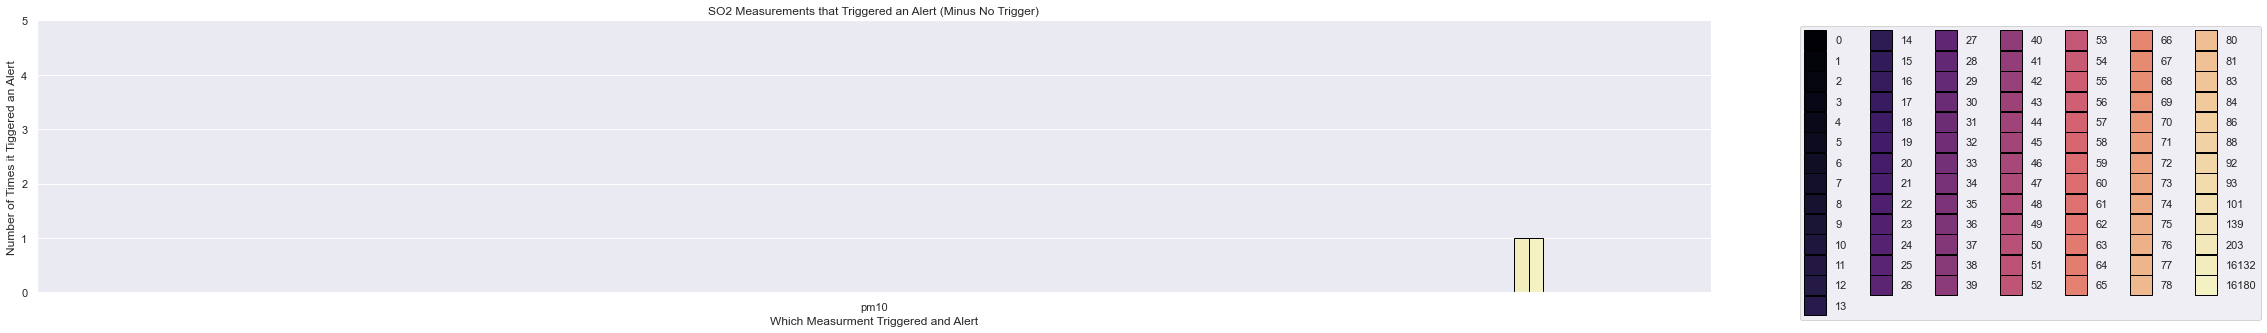

In [154]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm10', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=7,handleheight=2.4, labelspacing=0.05)

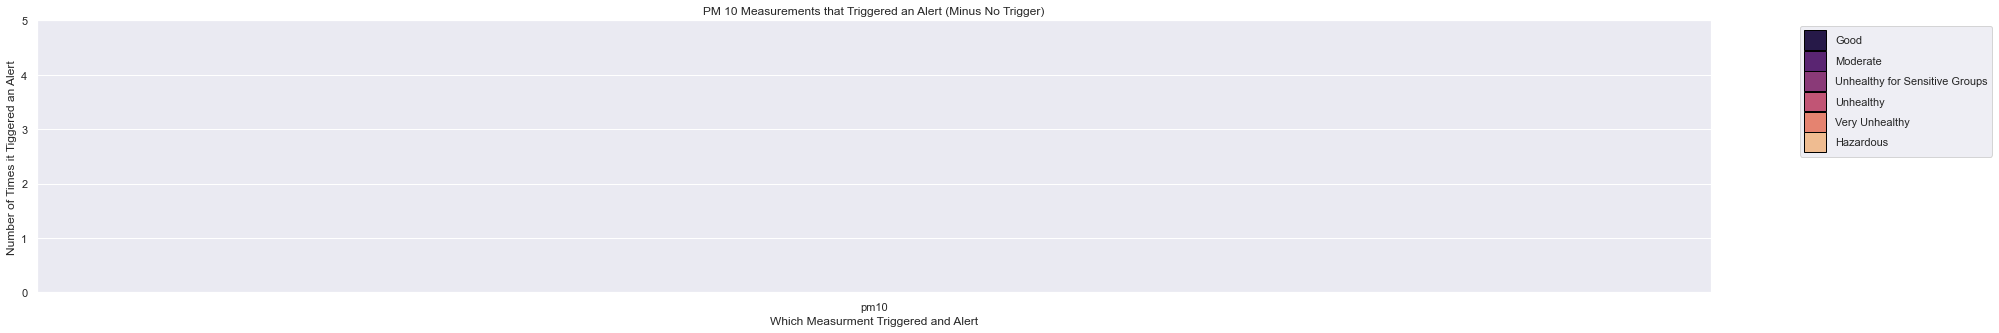

In [155]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm10', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 5))
plt.title('PM 10 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

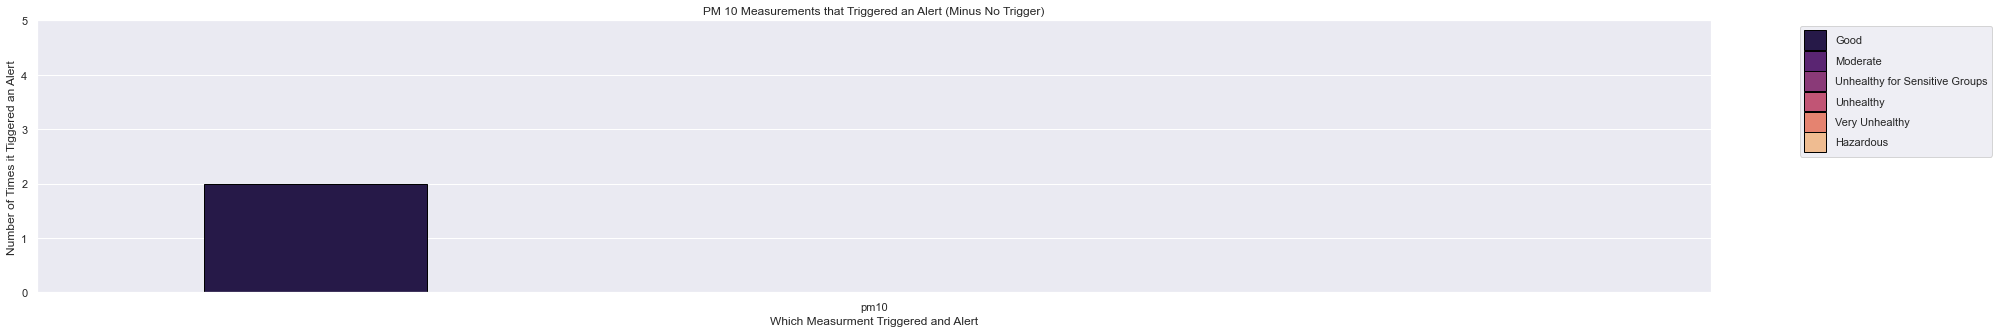

In [156]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm10_24hr', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 5))
plt.title('PM 10 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [159]:
air.AQI_pm10.value_counts()

Good                              104539
Moderate                            1744
Unhealthy for Sensitive Groups         1
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Name: AQI_pm10, dtype: int64

In [161]:
air.AQI_pm10_24hr.value_counts()

Good                              106287
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Moderate                               0
Name: AQI_pm10_24hr, dtype: int64

### Takeaways:
- Pretty much nothing is triggering for PM 10
    - this makes sense since there are not readings above unhealthy for sensitive groups
___

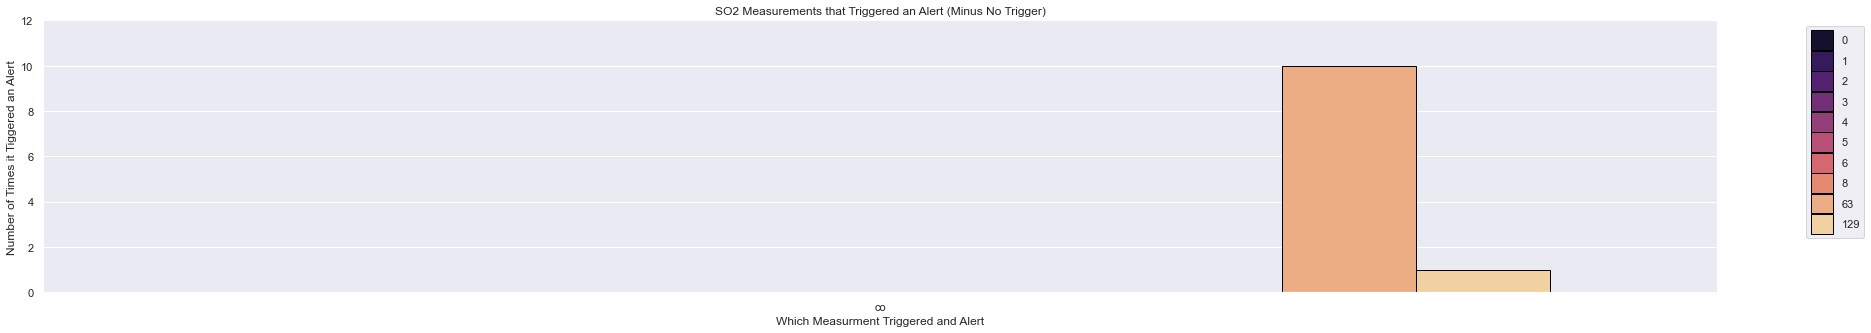

In [162]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='CO', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

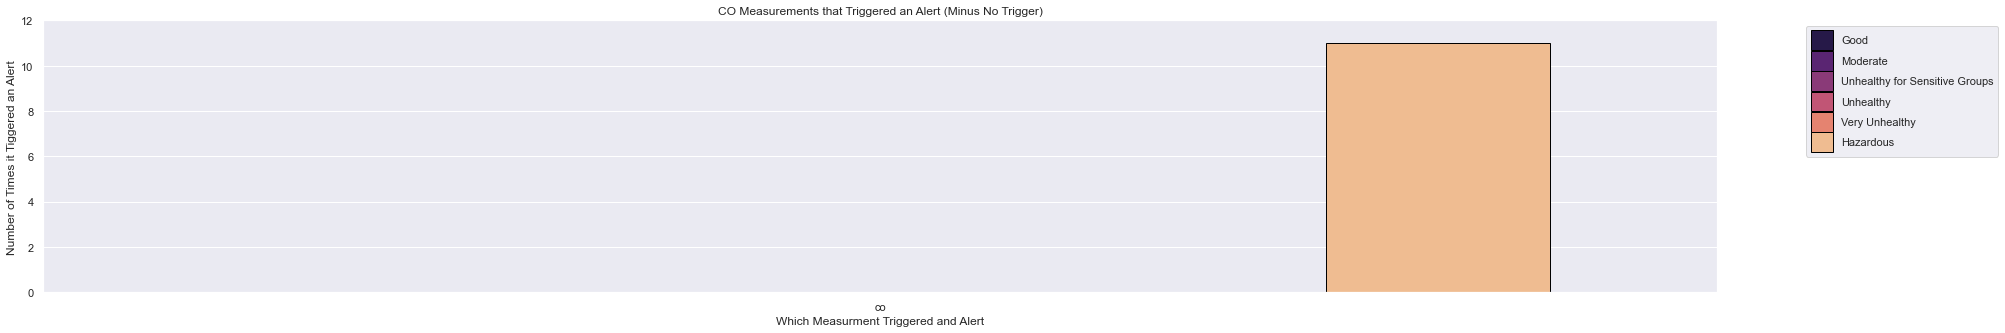

In [233]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_CO', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('CO Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

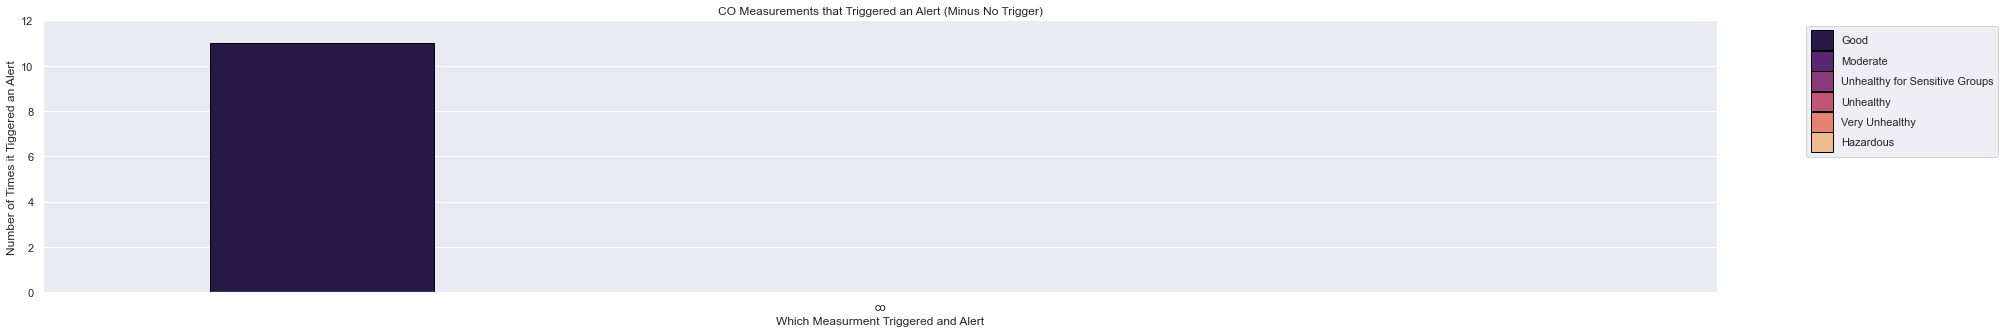

In [166]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_CO_24hr', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('CO Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [164]:
air.AQI_CO.value_counts()

Good                              106142
Moderate                             121
Hazardous                             23
Unhealthy                              1
Very Unhealthy                         0
Unhealthy for Sensitive Groups         0
Name: AQI_CO, dtype: int64

In [167]:
air.AQI_CO_24hr.value_counts()

Good                              106287
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Moderate                               0
Name: AQI_CO_24hr, dtype: int64

### Takeaways:
- Unhealthy is not causing a trigger?
___

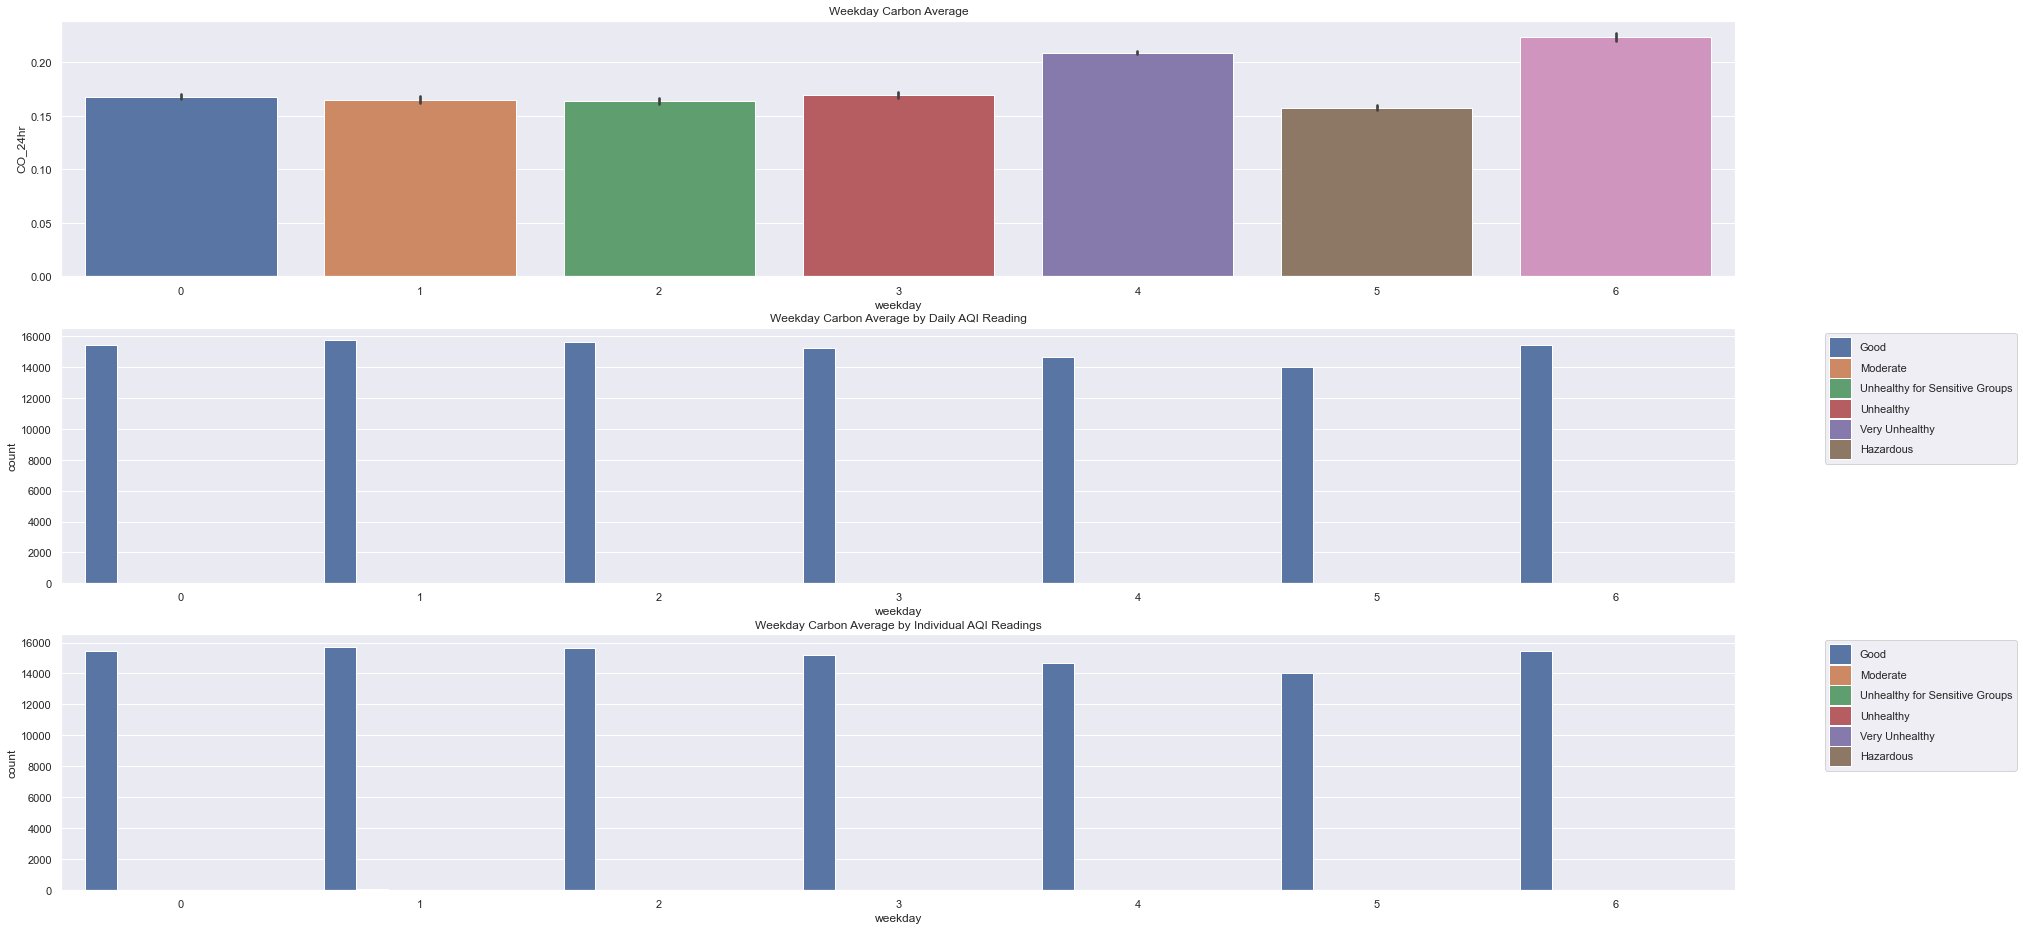

In [183]:
plt.subplots(3,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='weekday', y='CO_24hr')
plt.title('Weekday Carbon Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='weekday', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='weekday', hue='AQI_CO')
plt.title('Weekday Carbon Average by Individual AQI Readings')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 65.0)]

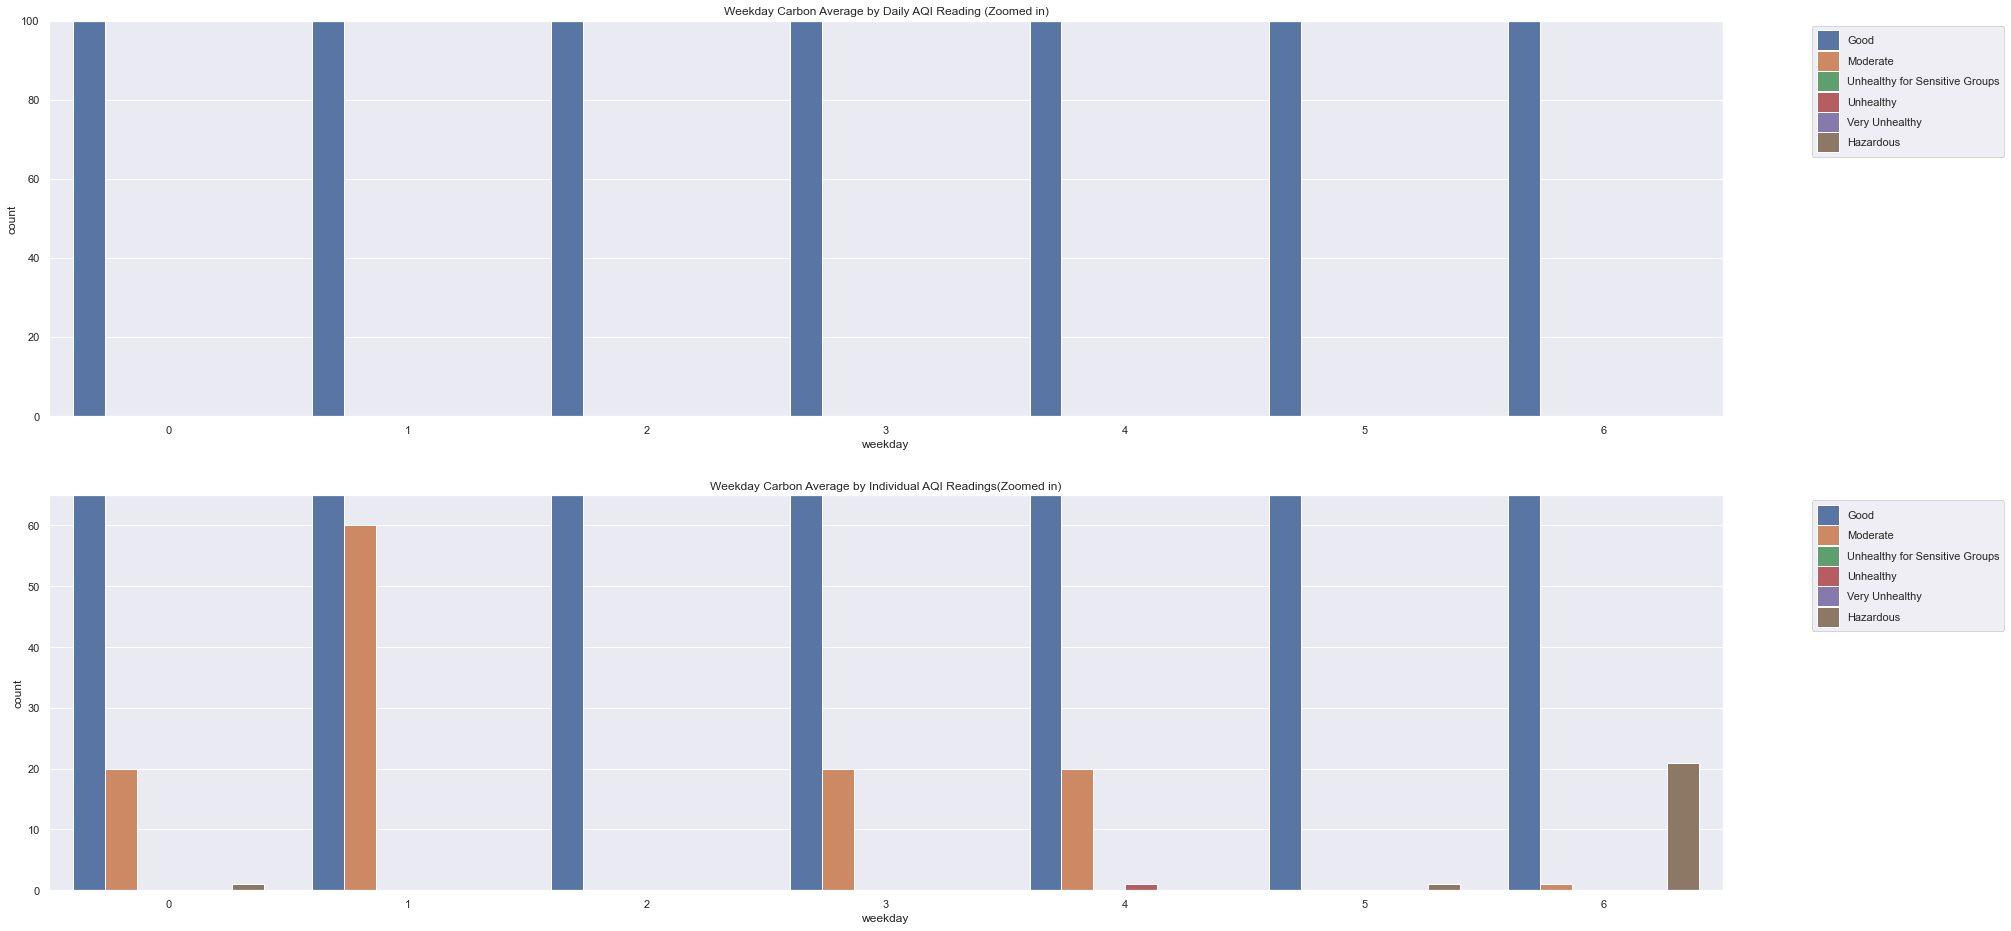

In [190]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='weekday', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 100))

plt.subplot(2,1,2)
plot = sns.countplot(data=air, x='weekday', hue='AQI_CO')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 65))

### Takeaways:
- Fridays and Sundays have the hightest average Carbon Monoxide readings
- There are significantly more readings in the good range than any other
    - In fact there are only good readings when it comes to daily averages
- For individual readings 
    - Sunday has the most Hazerdous readings
    - Friday has some unhealthy readings and Saturday has some hazerdous readings
___

Text(0.5, 1.0, 'Weekday PM 2.5 Average by Individual AQI Readings')

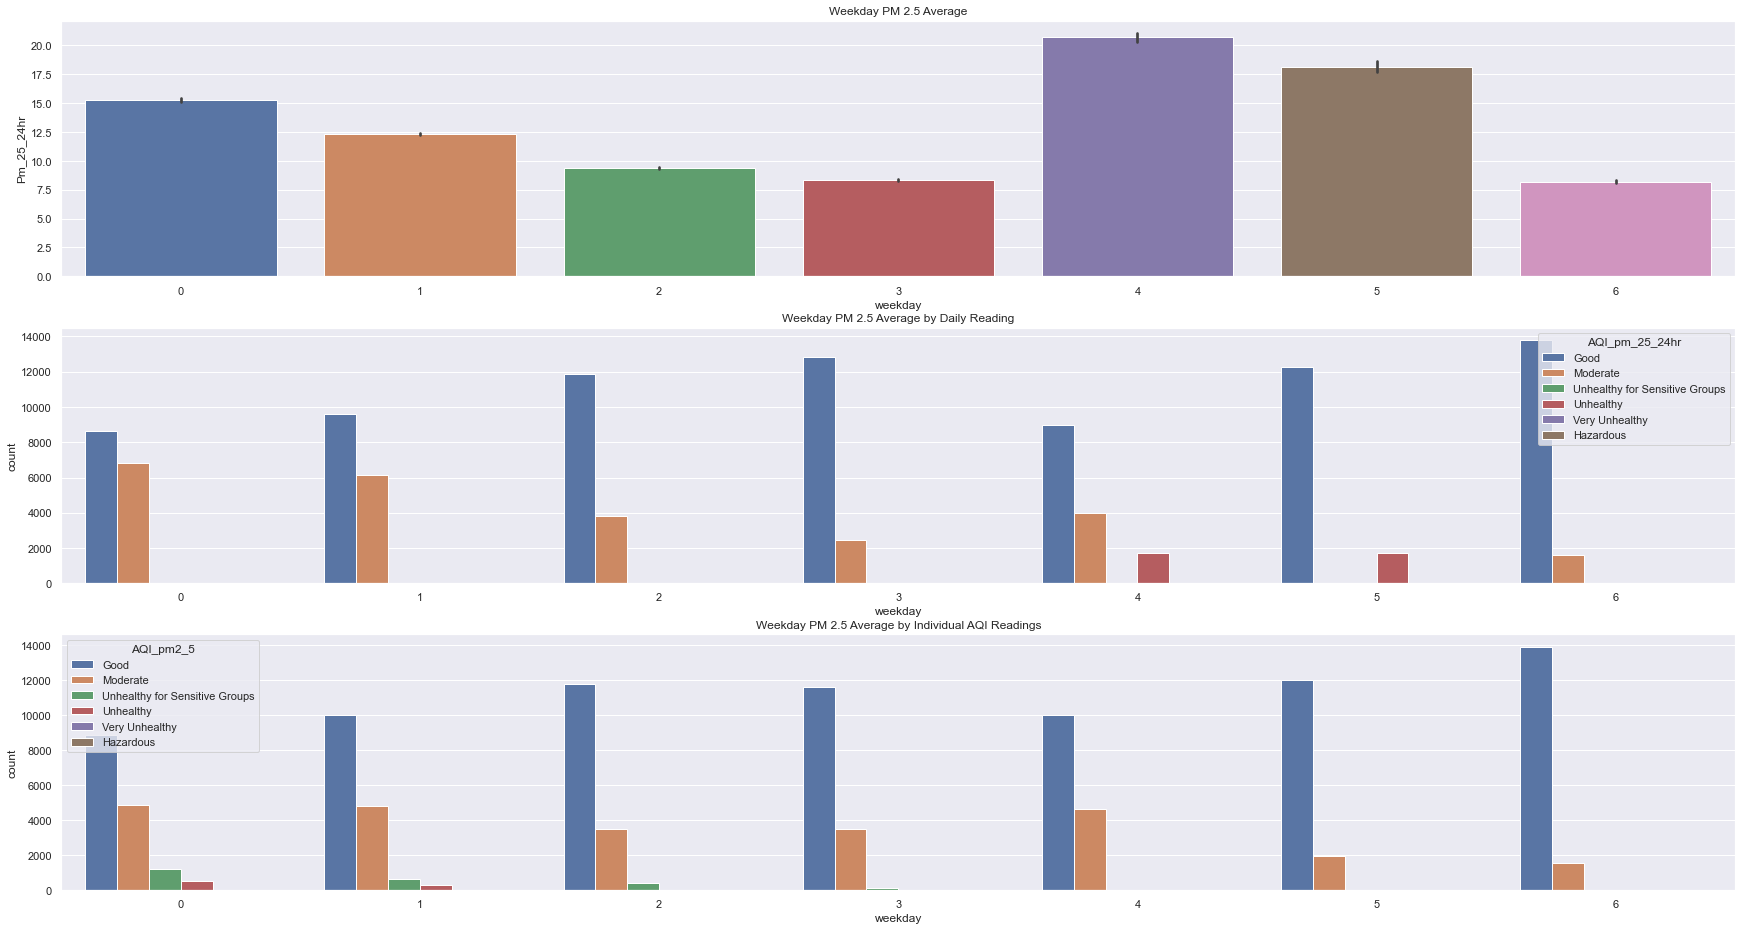

In [181]:
plt.subplots(3,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='weekday', y='Pm_25_24hr')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='weekday', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average by Daily Reading')

plt.subplot(3,1,3)
sns.countplot(data=air, x='weekday', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')

[(0.0, 600.0)]

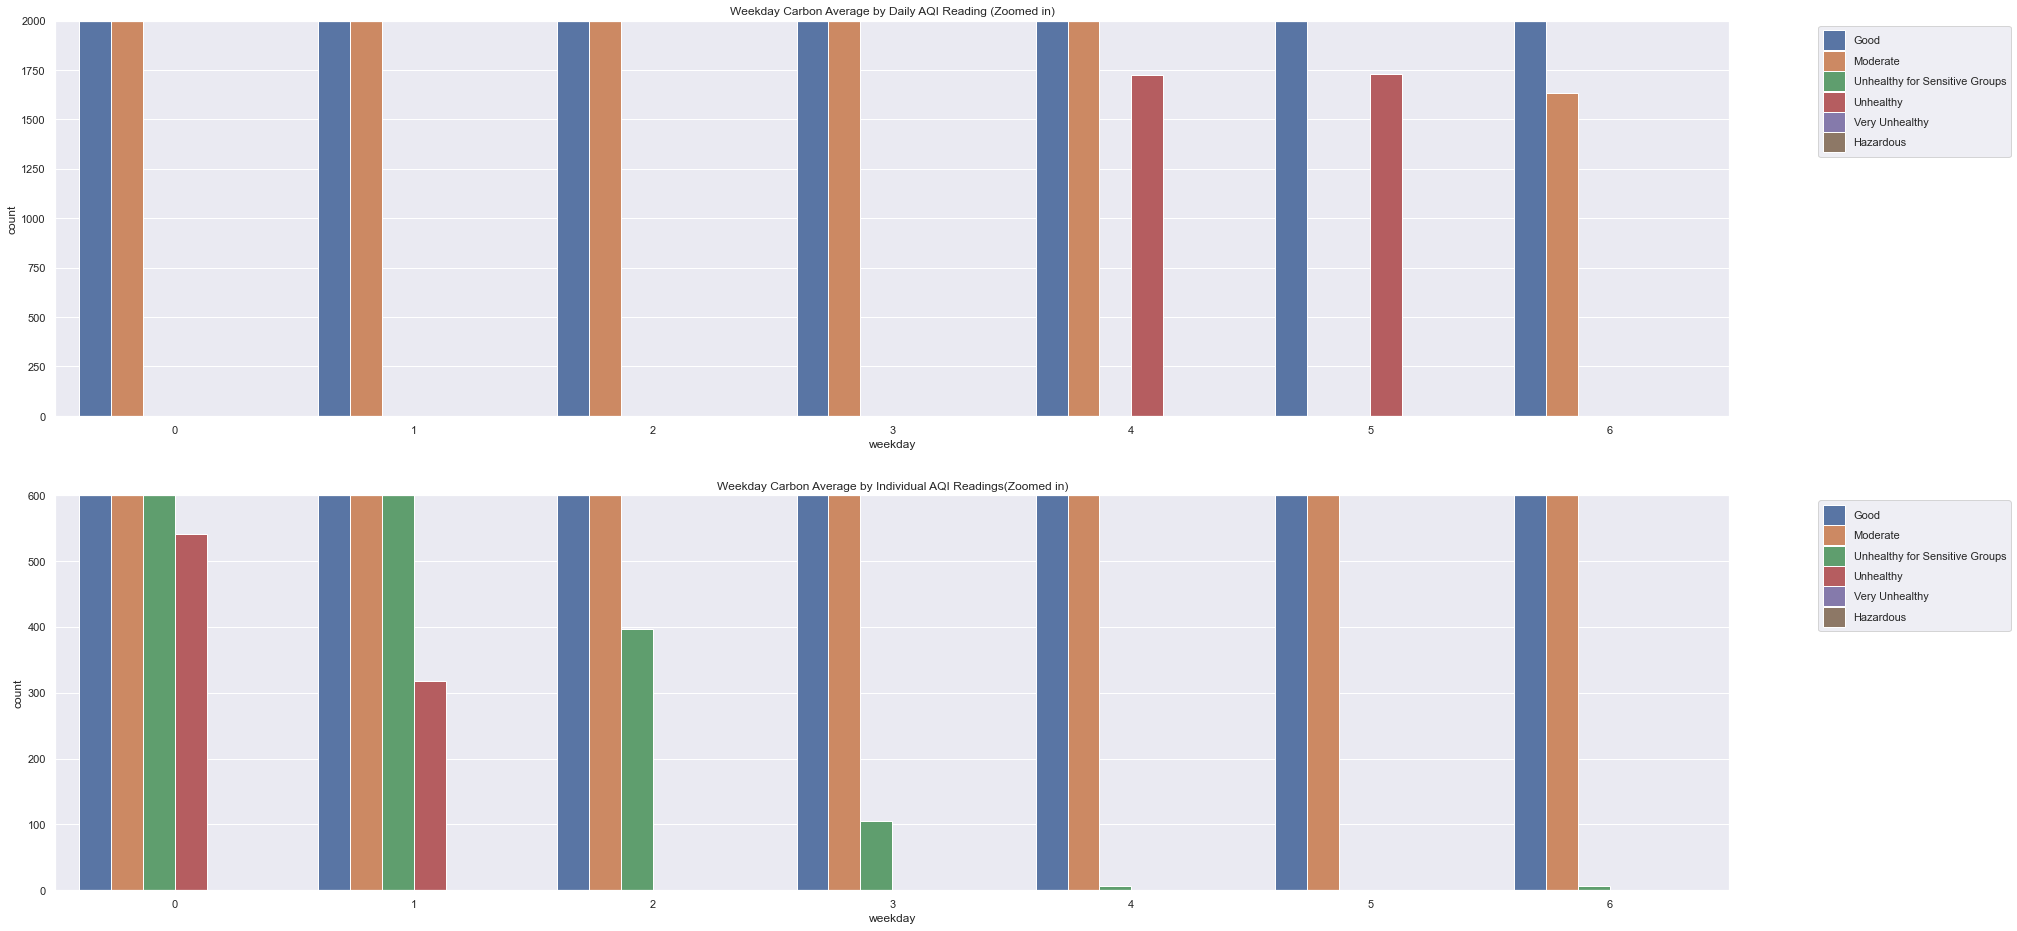

In [199]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='weekday', hue='AQI_pm_25_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 2000))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='weekday', hue='AQI_pm2_5')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 600))

### Takeaways:
- Friday and Saturday have more unhealthy readings for the day than any other day.
- Monday and Tuesday have more individual unhealthy readings
___

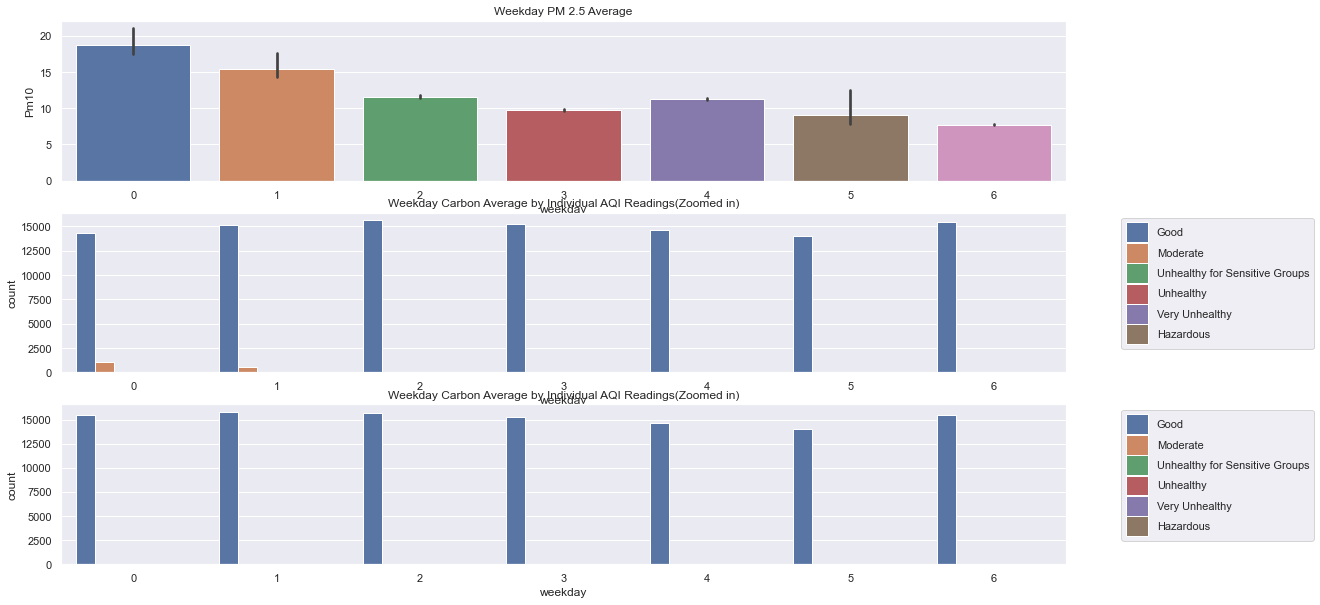

In [202]:
plt.subplots(3,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='weekday', y='Pm10')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='weekday', hue='AQI_pm10')
plt.title('Weekday PM 2.5 Average')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='weekday', hue='AQI_pm10_24hr')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 20.0)]

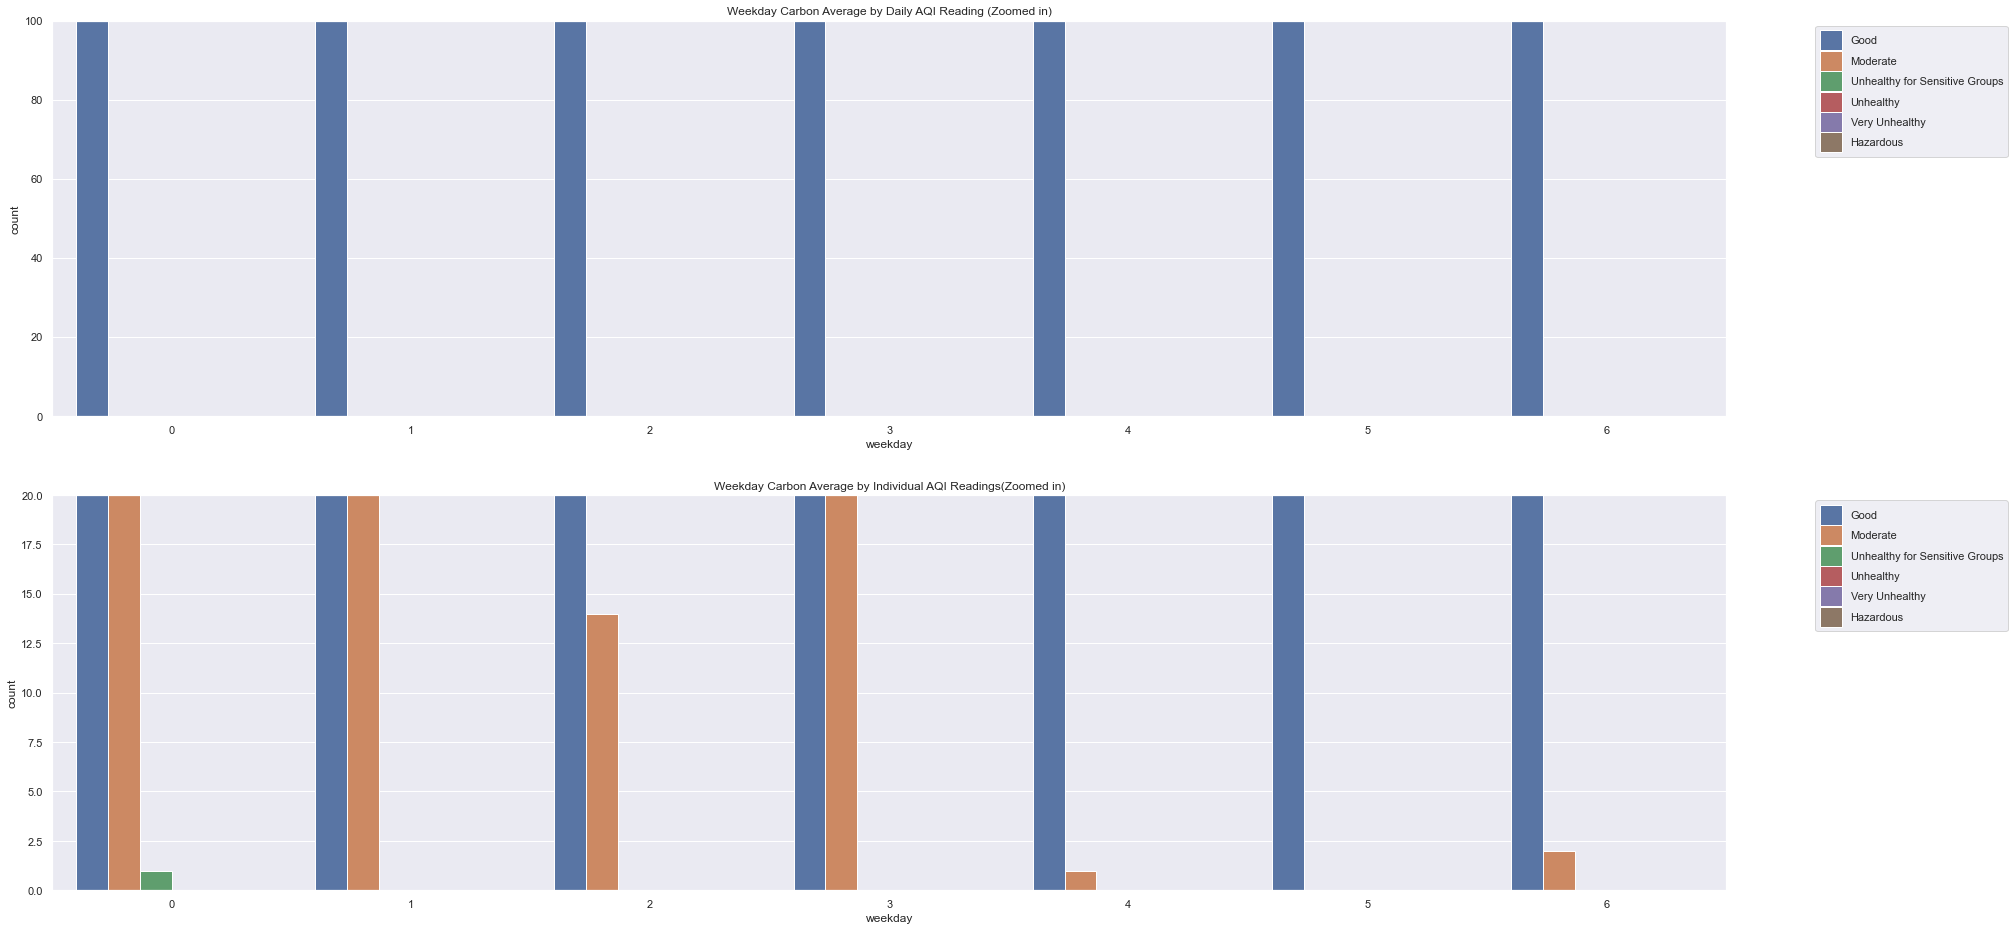

In [205]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='weekday', hue='AQI_pm10_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 100))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='weekday', hue='AQI_pm10')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 20))

### Takeaways:
- PM10 has no readings that are unhealthy or hazerdous in either daily or individual readings

___

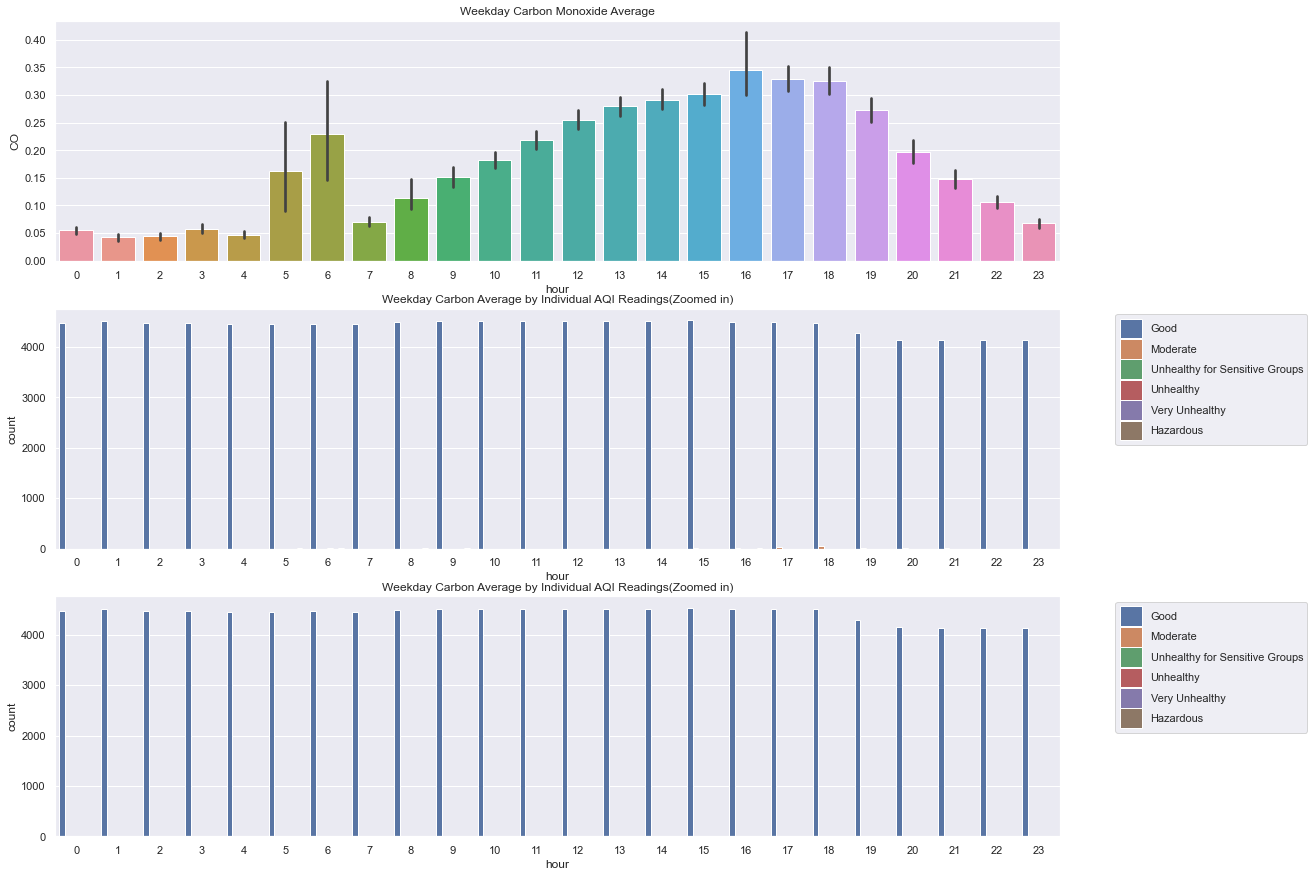

In [214]:
plt.subplots(3,1, figsize=(18,15), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='hour', y='CO')
plt.title('Weekday Carbon Monoxide Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='hour', hue='AQI_CO')
plt.title('Weekday CO Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='hour', hue='AQI_CO_24hr')
plt.title('Weekday PM 2.5 Average by Daily AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 30.0)]

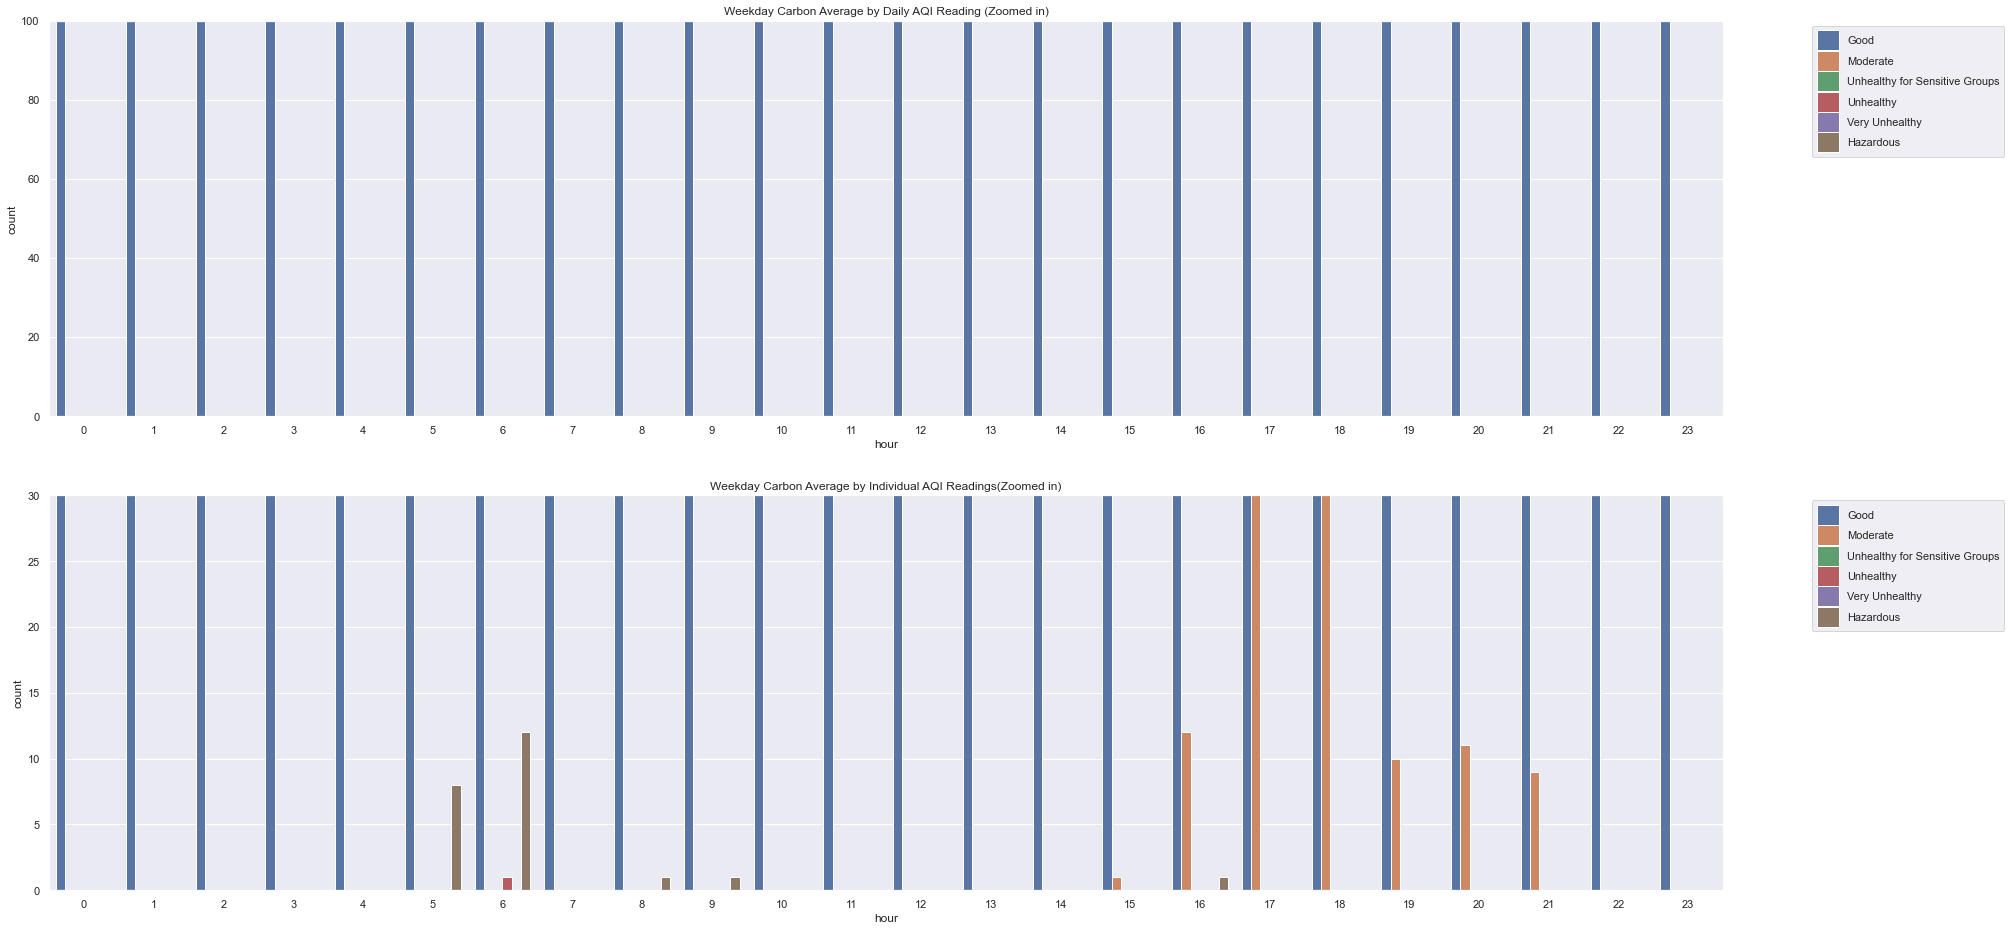

In [234]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='hour', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 100))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='hour', hue='AQI_CO')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 30))

### Takeaways:
- 5 and 6 am have the most hazerdous reading throughout the day. But there are still more readings in the good range.
- There are no daily averages outside of good air quality
___

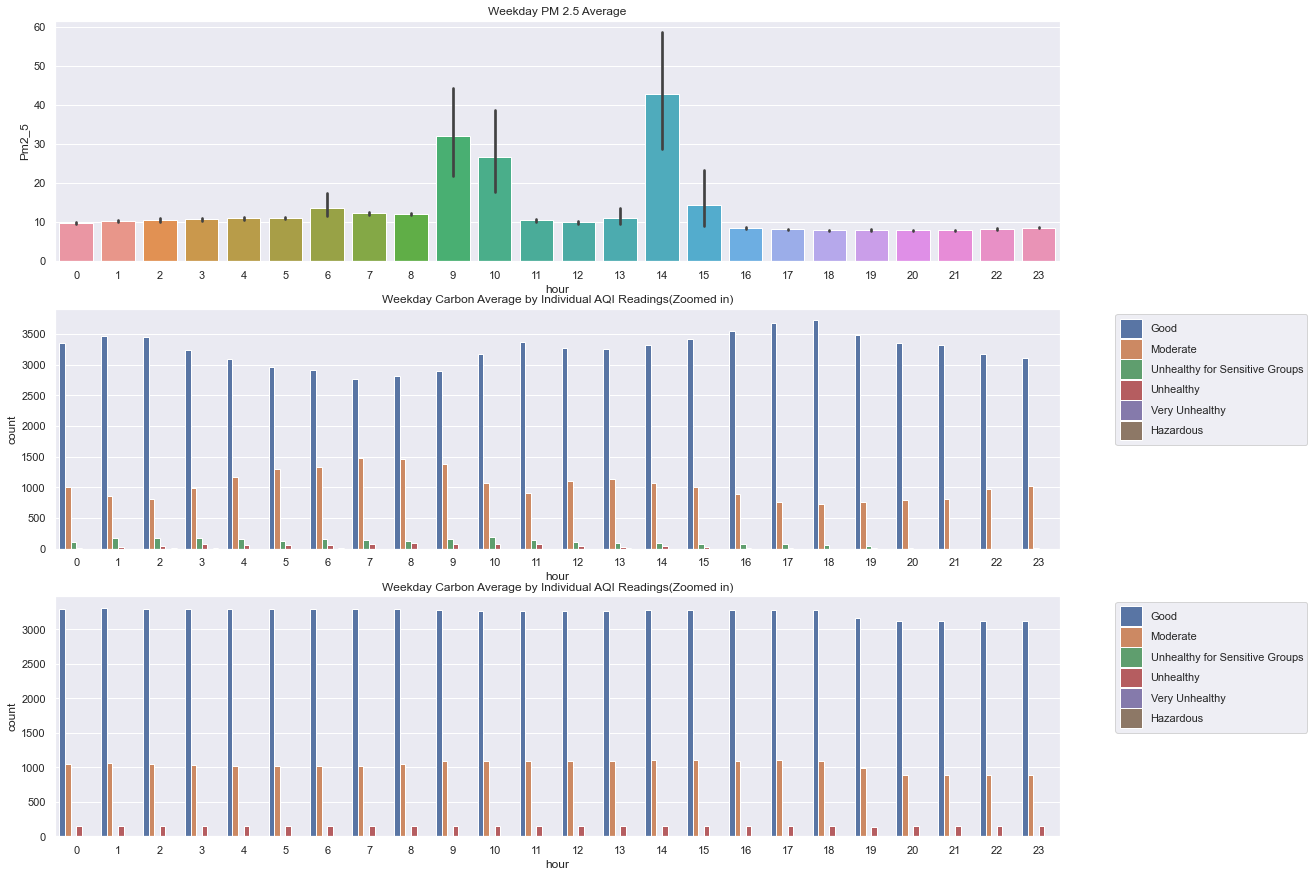

In [220]:
plt.subplots(3,1, figsize=(18,15), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='hour', y='Pm2_5')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='hour', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='hour', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average by Daily AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 10.0)]

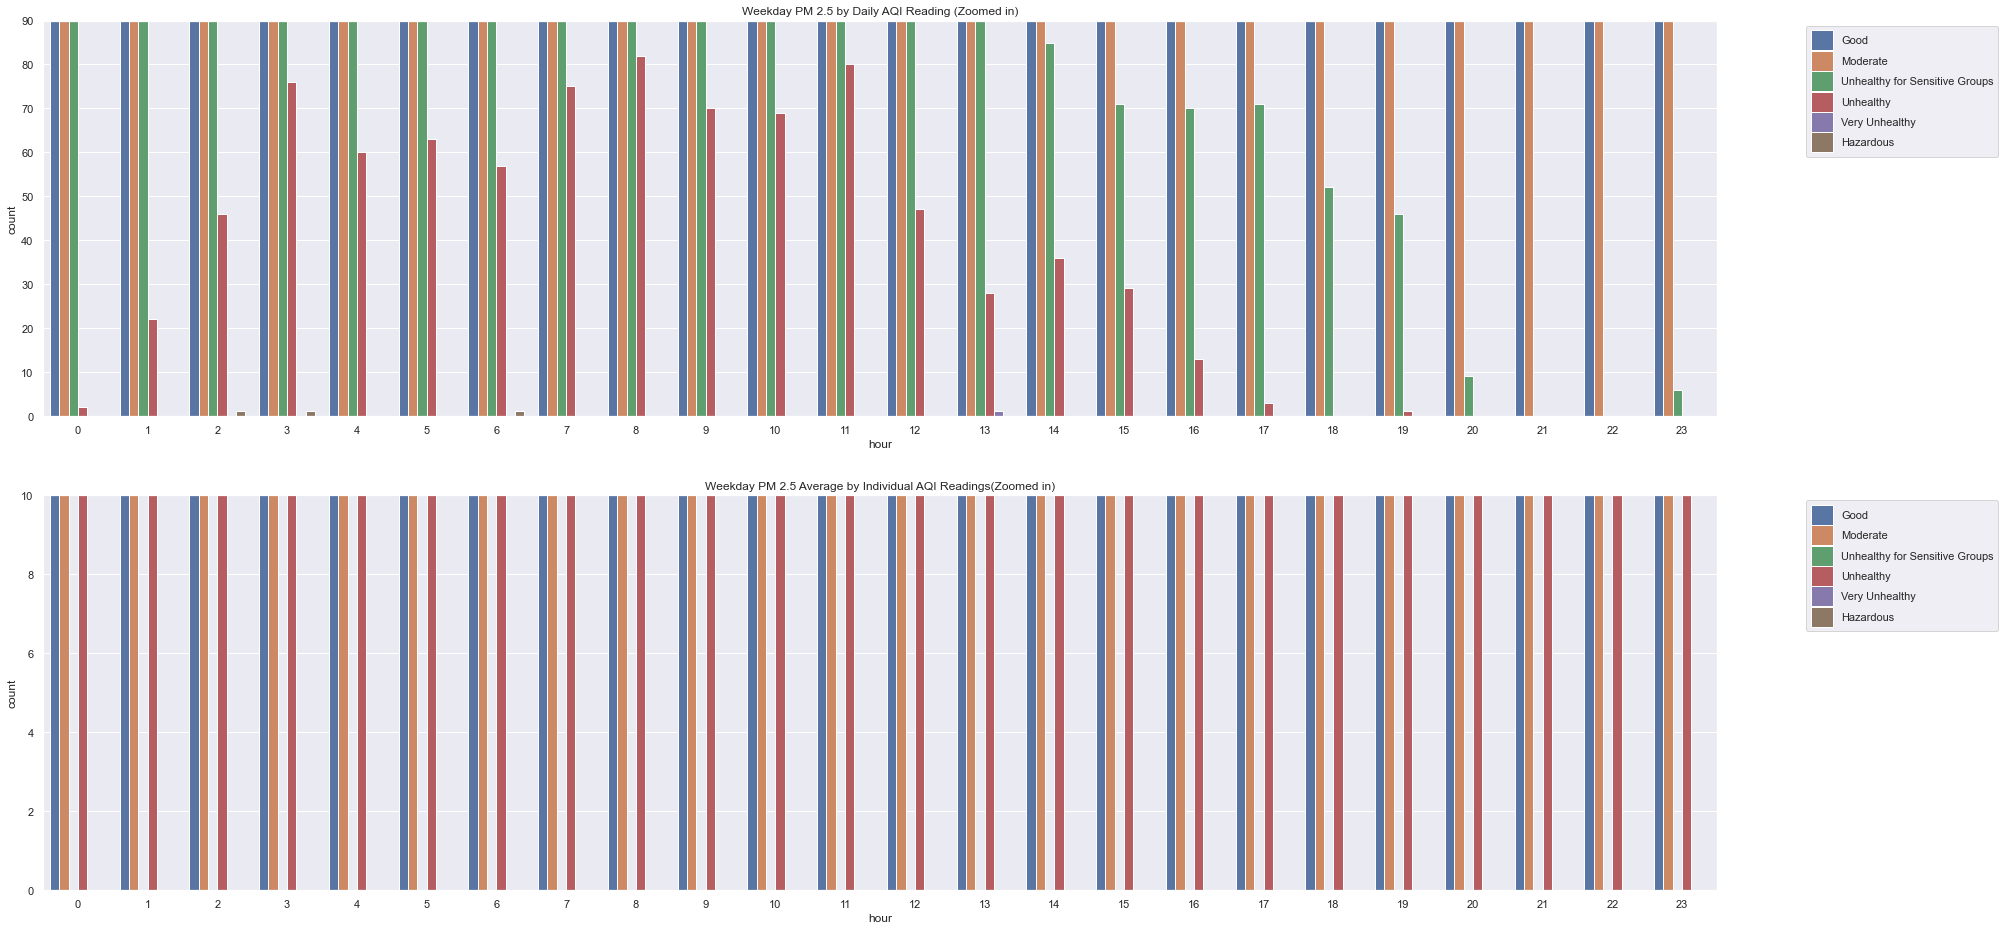

In [230]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='hour', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 90))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='hour', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 10))

### Takeaways:
- 2 pm has the highest average pm 2.5 reading
- Peak hours for unhealthy readings is 3 am, 8 am, and 11am
___

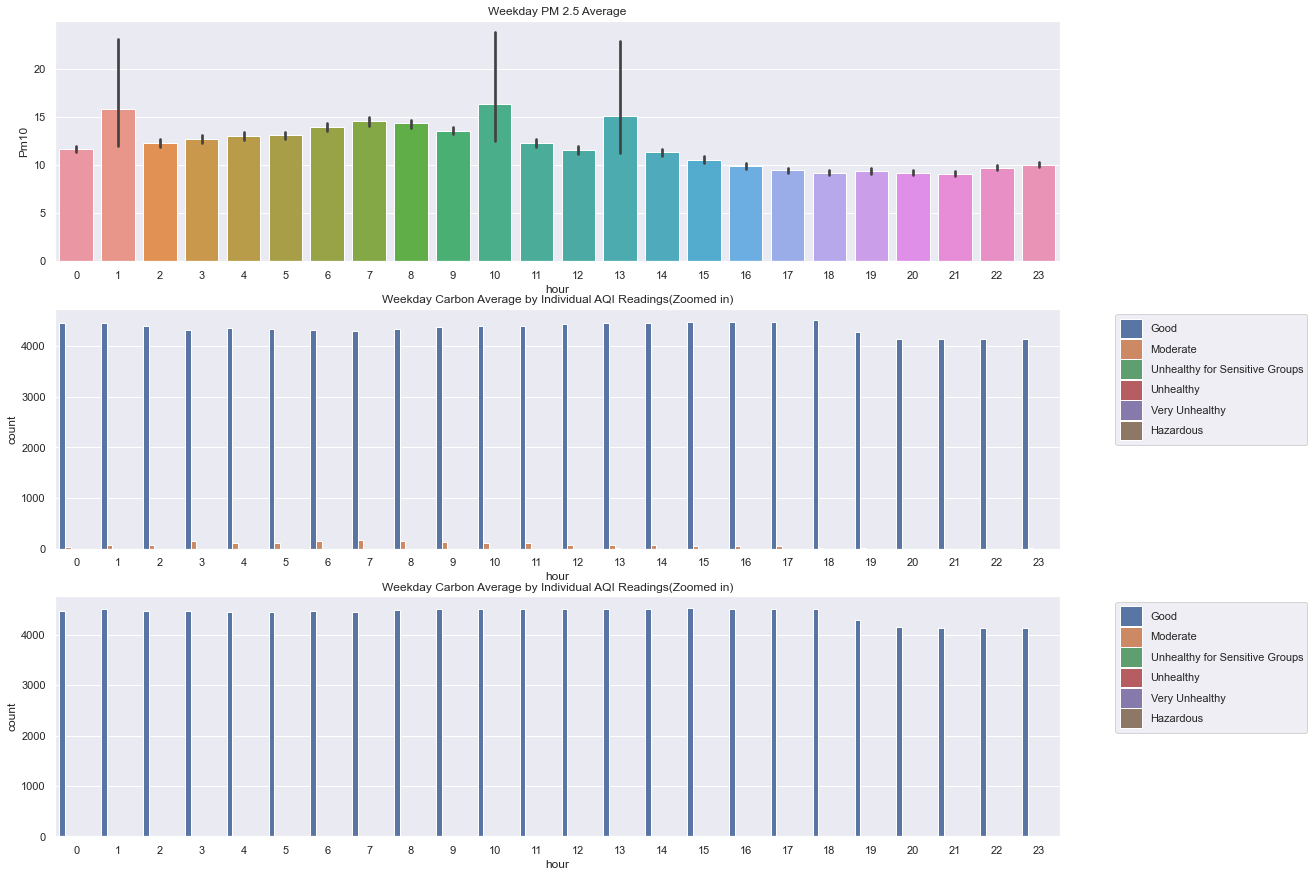

In [229]:
plt.subplots(3,1, figsize=(18,15), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='hour', y='Pm10')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='hour', hue='AQI_pm10')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='hour', hue='AQI_pm10_24hr')
plt.title('Weekday PM 2.5 Average by Daily AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 10.0)]

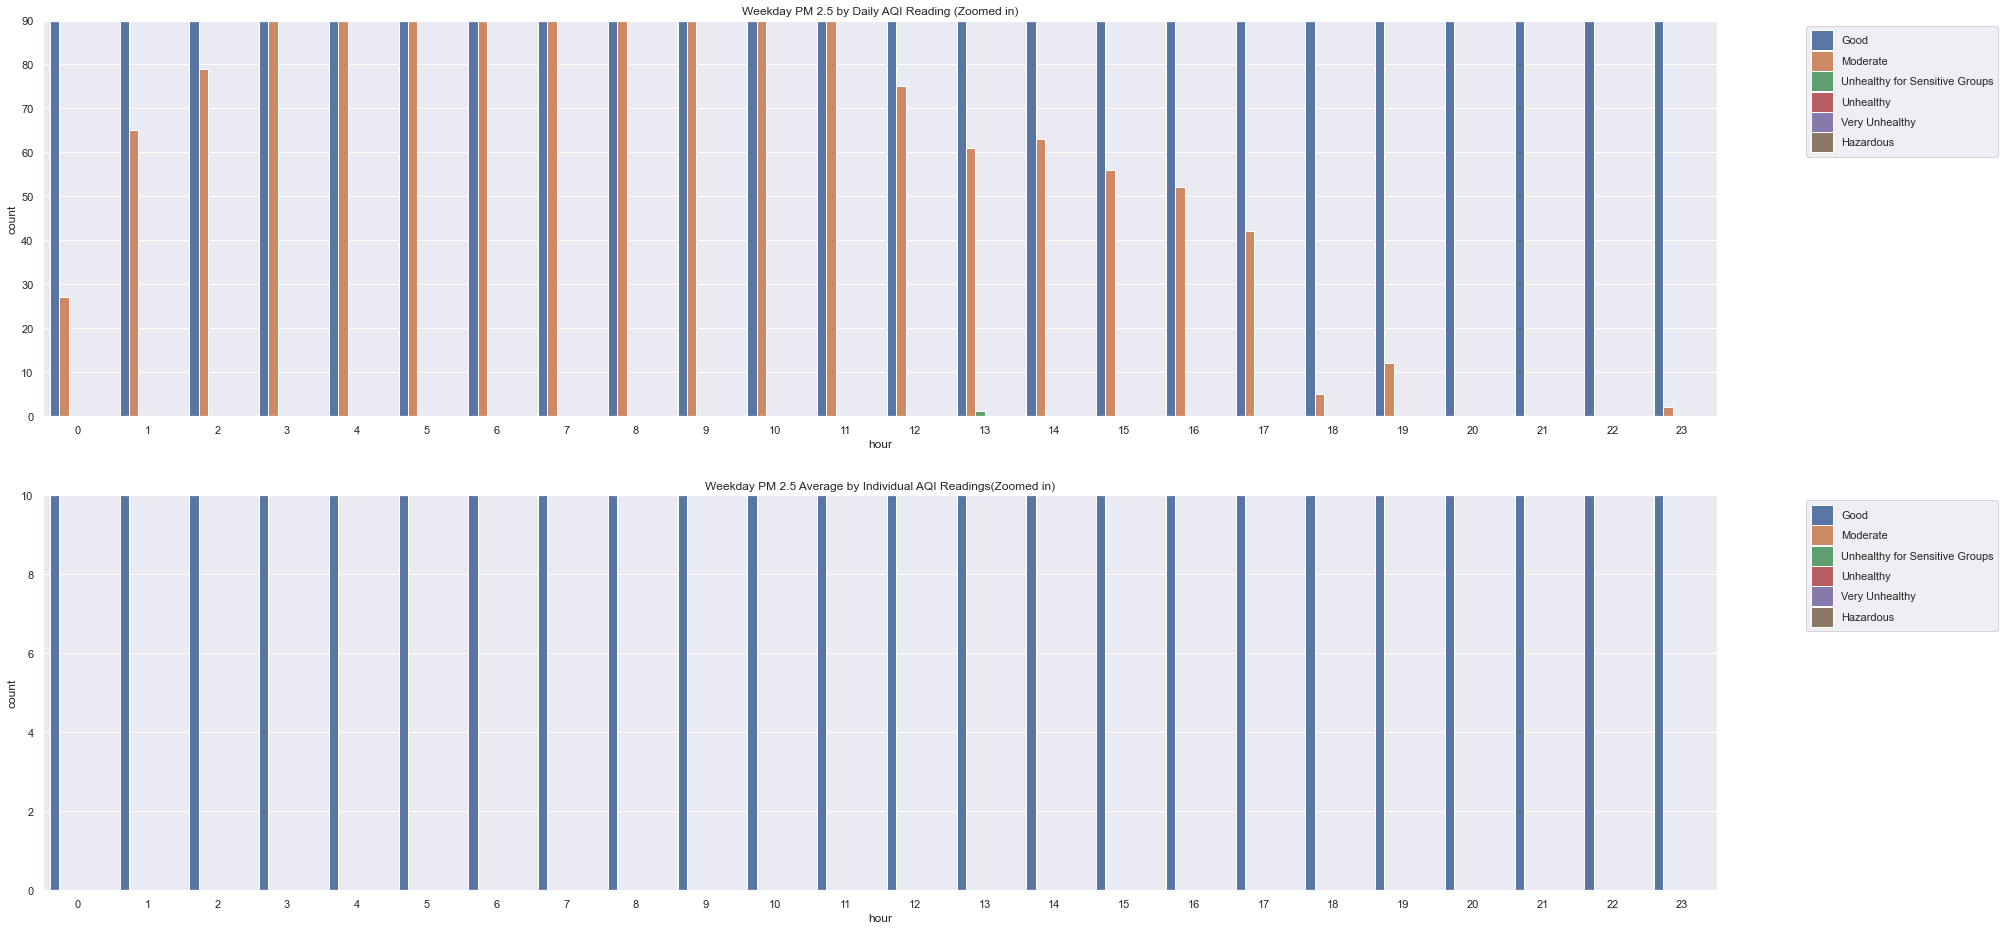

In [231]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='hour', hue='AQI_pm10')
plt.title('Weekday PM 2.5 by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 90))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='hour', hue='AQI_pm10_24hr')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 10))

### Takeaways:
- nothing crazy here